In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  read data from ‘Gainsville data.xlsx’ -- user survey data

import pandas as pd

# Assuming the file is in your Google Drive's 'My Drive' folder
file_path = '/content/drive/My Drive/Gainesville data.xlsx'

try:
  df = pd.read_excel(file_path)
  # print(df.head())  # Print the first few rows to verify
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")


In [6]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


In [7]:
# make dynamic maps to display all the spots that chosen
# using clustering to make the plots clean --> reduce density
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_q22_first_three_lat_lng(text):
    """
    Extracts latitude and longitude for the first three locations from the Q22 column format.

    Args:
      text: The input string.

    Returns:
      A list of up to three tuples, each containing (latitude, longitude) or an empty list if not found.
    """
    locations = []
    if isinstance(text, str) and text.strip() != '' and text.strip() != 'missing':
        json_string = f'[{text}]' if not text.strip().startswith('[') else text
        try:
            json_string = json_string.replace("'", '"')
            json_string = json_string.replace('}{', '},{')
            data = json.loads(json_string)
            for i, item in enumerate(data):
                if 'lat' in item and 'lng' in item:
                    locations.append((item['lat'], item['lng']))
                if len(locations) == 3: # Stop after the first three
                    break
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from Q22: {e} in text: {text}")
            pass # Ignore rows with decoding errors
    return locations

# Apply the function to the 'Q22' column
df['Q22_first_three_coords'] = df['Q22'].apply(extract_q22_first_three_lat_lng)

# Create a list of all individual location points for Q22 with their order (1st, 2nd, or 3rd)
all_q22_locations_ordered = []
for index, row in df.iterrows():
    for i, (lat, lng) in enumerate(row['Q22_first_three_coords']):
        all_q22_locations_ordered.append((i + 1, lat, lng)) # Store order (1, 2, or 3), lat, lng

# Create a DataFrame from the extracted Q22 locations with order
df_q22_locations_ordered = pd.DataFrame(all_q22_locations_ordered, columns=['order', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q22 locations on a map with clustering and different colors for the first three ---
print(f"Number of Q22 locations to plot: {len(df_q22_locations_ordered)}")
if not df_q22_locations_ordered.empty:
    avg_lat_q22 = df_q22_locations_ordered['lat'].mean()  # use the mean value to find cluster center
    avg_lng_q22 = df_q22_locations_ordered['lng'].mean()
    m_q22 = folium.Map(location=[avg_lat_q22, avg_lng_q22], zoom_start=12)

    # Define colors for the first three locations
    q22_color_map = {
        1: 'lightblue',
        2: 'lightred',
        3: 'lightorange'
    }

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q22)

    # Add markers for Q22 locations with specific colors and tooltips to the cluster
    for index, row in df_q22_locations_ordered.iterrows():
        order = row['order']
        lat = row['lat']
        lng = row['lng']
        color = q22_color_map.get(order, 'gray') # Default to gray for anything beyond the third

        # Using a different icon style (e.g., a simpler circle or a different marker)
        folium.Marker(
            [lat, lng],
            icon=folium.Icon(color=color, icon='info-sign'), # You can explore other icons like 'circle', 'flag', etc.
            tooltip=f"Q22 - Location {order}"
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q22 First Three Locations:")
    display(m_q22)
else:
    print("\nNo valid coordinates found in the 'Q22' column to plot.")

Error decoding JSON from Q22: Expecting value: line 1 column 105 (char 104) in text: {"lat":29.66061976939696,"lng":-82.35578741854097},{"lat":29.667481304956265,"lng":-82.31149878328706},undefined
Error decoding JSON from Q22: Expecting value: line 1 column 54 (char 53) in text: {"lat":29.645141272323734,"lng":-82.34699249267578},undefined,undefined
Error decoding JSON from Q22: Expecting value: line 1 column 54 (char 53) in text: {"lat":29.649282294063703,"lng":-82.35613074129488},undefined,undefined
Error decoding JSON from Q22: Expecting value: line 1 column 106 (char 105) in text: {"lat":29.638487707644646,"lng":-82.35886308157379},{"lat":29.645005077546816,"lng":-82.35538144784647},undefined
Error decoding JSON from Q22: Expecting value: line 1 column 54 (char 53) in text: {"lat":29.655627051281733,"lng":-82.40865792421363},
Error decoding JSON from Q22: Expecting value: line 1 column 104 (char 103) in text: {"lat":29.64541181050404,"lng":-82.34651543205486},{"lat":29.62733924660

/tmp/ipython-input-175842251.py:75: UserWarning: color argument of Icon should be one of: {'red', 'gray', 'lightgray', 'white', 'darkgreen', 'blue', 'darkpurple', 'orange', 'darkred', 'purple', 'green', 'darkblue', 'black', 'lightred', 'beige', 'lightblue', 'pink', 'lightgreen', 'cadetblue'}.
  icon=folium.Icon(color=color, icon='info-sign'), # You can explore other icons like 'circle', 'flag', etc.



Map of Q22 First Three Locations:


In [ ]:
# Export the map to an HTML file
m_q22.save('/content/drive/My Drive/q22_first_three_locations_map.html')
print("Map exported to q22_first_three_locations_map.html")

Map exported to q22_first_three_locations_map.html


In [8]:
import nltk
nltk.download('punkt')
print(nltk.data.find('tokenizers/punkt'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/root/nltk_data/tokenizers/punkt


In [9]:
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_q22_first_three_lat_lng_refined(text):
    """
    Extracts latitude and longitude for the first three locations from the Q22 column format,
    with improved error handling for malformed entries like 'undefined'.

    Args:
      text: The input string.

    Returns:
      A list of up to three tuples, each containing (latitude, longitude) or an empty list if not found or parsing fails.
    """
    locations = []
    if isinstance(text, str) and text.strip() != '' and text.strip() != 'missing':
        # Attempt to clean up the string before parsing
        # Remove 'undefined' and any trailing commas around it
        cleaned_text = re.sub(r',?\s*undefined\s*', '', text)
        # Ensure the cleaned text is a valid JSON array string
        if not cleaned_text.strip().startswith('['):
             cleaned_text = f'[{cleaned_text}]'

        try:
            # Replace single quotes with double quotes for valid JSON
            cleaned_text = cleaned_text.replace("'", '"')
            # Handle cases where objects are not separated by comma
            cleaned_text = cleaned_text.replace('}{', '},{')

            data = json.loads(cleaned_text)
            for i, item in enumerate(data):
                # Ensure item is a dictionary and contains lat/lng
                if isinstance(item, dict) and 'lat' in item and 'lng' in item:
                    # Validate lat and lng are numbers
                    try:
                        lat = float(item['lat'])
                        lng = float(item['lng'])
                        locations.append((lat, lng))
                    except (ValueError, TypeError):
                        # Skip if lat or lng are not valid numbers
                        continue
                if len(locations) == 3: # Stop after the first three valid locations
                    break
        except json.JSONDecodeError as e:
            print(f"Refined Error decoding JSON from Q22: {e} in text: {text}")
            pass # Ignore rows with decoding errors
        except Exception as e:
            print(f"An unexpected error occurred during Q22 parsing: {e} in text: {text}")
            pass

    return locations

# Apply the refined function to the 'Q22' column
df['Q22_first_three_coords_refined'] = df['Q22'].apply(extract_q22_first_three_lat_lng_refined)

# Create a list of all individual location points for Q22 with their order (1st, 2nd, or 3rd)
all_q22_locations_ordered = []
for index, row in df.iterrows():
    for i, (lat, lng) in enumerate(row['Q22_first_three_coords_refined']):
        all_q22_locations_ordered.append((i + 1, lat, lng)) # Store order (1, 2, or 3), lat, lng

# Create a DataFrame from the extracted Q22 locations with order
df_q22_locations_ordered = pd.DataFrame(all_q22_locations_ordered, columns=['order', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q22 locations on a map with clustering and different colors for the first three ---
print(f"Number of Q22 locations to plot: {len(df_q22_locations_ordered)}")
if not df_q22_locations_ordered.empty:
    avg_lat_q22 = df_q22_locations_ordered['lat'].mean()
    avg_lng_q22 = df_q22_locations_ordered['lng'].mean()
    m_q22 = folium.Map(location=[avg_lat_q22, avg_lng_q22], zoom_start=12)

    # Define colors for the first three locations
    q22_color_map = {
        1: 'lightblue',
        2: 'lightred',
        3: 'lightorange'
    }

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q22)

    # Add markers for Q22 locations with specific colors and tooltips to the cluster
    for index, row in df_q22_locations_ordered.iterrows():
        order = row['order']
        lat = row['lat']
        lng = row['lng']
        color = q22_color_map.get(order, 'gray') # Default to gray for anything beyond the third

        # Using a different icon style (e.g., a simpler circle or a different marker)
        folium.Marker(
            [lat, lng],
            icon=folium.Icon(color=color, icon='info-sign'), # You can explore other icons like 'circle', 'flag', etc.
            tooltip=f"Q22 - Location {order}"
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q22 First Three Locations:")
    display(m_q22)
else:
    print("\nNo valid coordinates found in the 'Q22' column to plot.")

Refined Error decoding JSON from Q22: Expecting value: line 1 column 54 (char 53) in text: {"lat":29.655627051281733,"lng":-82.40865792421363},
Refined Error decoding JSON from Q22: Expecting value: line 1 column 53 (char 52) in text: {"lat":29.68463309600439,"lng":-82.27579321688081},
Refined Error decoding JSON from Q22: Expecting value: line 1 column 53 (char 52) in text: {"lat":29.65634350253421,"lng":-82.40940656838048},
Refined Error decoding JSON from Q22: Expecting value: line 1 column 105 (char 104) in text: {"lat":29.62430923926433,"lng":-82.38499131029512},{"lat":29.639259259364803,"lng":-82.34610739633786},
Refined Error decoding JSON from Q22: Expecting value: line 1 column 53 (char 52) in text: {"lat":29.64826509189439,"lng":-82.36046699123287},
Refined Error decoding JSON from Q22: Expecting value: line 1 column 53 (char 52) in text: {"lat":29.64545798408485,"lng":-82.34683003272949},
Refined Error decoding JSON from Q22: Expecting value: line 1 column 104 (char 103) in 

/tmp/ipython-input-3526571675.py:95: UserWarning: color argument of Icon should be one of: {'red', 'gray', 'lightgray', 'white', 'darkgreen', 'blue', 'darkpurple', 'orange', 'darkred', 'purple', 'green', 'darkblue', 'black', 'lightred', 'beige', 'lightblue', 'pink', 'lightgreen', 'cadetblue'}.
  icon=folium.Icon(color=color, icon='info-sign'), # You can explore other icons like 'circle', 'flag', etc.


In [ ]:
m_q22.save('/content/drive/My Drive/q22_first_three_locations_map_refined.html')
print("Map exported to q22_first_three_locations_map_refined.html")

Map exported to q22_first_three_locations_map_refined.html


In [10]:
nltk.download('all')
from nltk.tokenize import word_tokenize
text = "This is a sample sentence."
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

['This', 'is', 'a', 'sample', 'sentence', '.']


[nltk_data]    | Downloading package words to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/words.zip.
[nltk_data]    | Downloading package ycoe to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [11]:
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_numbered_lat_lng_multiple(text):
    """
    Extracts latitude and longitude for all numbered locations from the text.

    Args:
      text: The input string.

    Returns:
      A list of tuples, each containing (number, latitude, longitude) or an empty list if none found.
    """
    locations = []
    if isinstance(text, str):
        # Find all occurrences of number:{"lat":...,"lng":...}
        matches = re.findall(r'(\d+):\{\"lat\":(\-?\d+\.?\d*),\"lng\":(\-?\d+\.?\d*)\}', text)
        for match in matches:
            number = int(match[0])
            lat = float(match[1])
            lng = float(match[2])
            locations.append((number, lat, lng))
    return locations

# Apply the function to the 'Q39' column
df['Q39_all_numbered_coords'] = df['Q39'].apply(extract_numbered_lat_lng_multiple)

# Create a list of all individual location points for Q39 with their numbers
all_q39_locations_numbered = []
for index, row in df.iterrows():
    all_q39_locations_numbered.extend(row['Q39_all_numbered_coords'])

# Create a DataFrame from the extracted Q39 locations with numbers
df_q39_locations_numbered = pd.DataFrame(all_q39_locations_numbered, columns=['number', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q39 locations on a map with clustering and different colors based on numbers ---
print(f"Number of Q39 locations to plot: {len(df_q39_locations_numbered)}")
if not df_q39_locations_numbered.empty:
    avg_lat_q39 = df_q39_locations_numbered['lat'].mean()
    avg_lng_q39 = df_q39_locations_numbered['lng'].mean()
    m_q39 = folium.Map(location=[avg_lat_q39, avg_lng_q39], zoom_start=12)

    # Define colors for specific numbers and a default color for others
    q39_color_map = {
        29: 'blue',
        30: 'yellow',
        33: 'purple'
        # Add more numbers and colors if needed
    }

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q39)

    # Add markers for Q39 locations with specific colors and tooltips to the cluster
    for index, row in df_q39_locations_numbered.iterrows():
        number = row['number']
        lat = row['lat']
        lng = row['lng']
        color = q39_color_map.get(number, 'gray') # Default to gray for numbers not in map

        folium.Marker(
            [lat, lng],
            icon=folium.Icon(color=color, icon='info-sign'), # Using 'info-sign' icon
            tooltip=f"Q39 - Number: {number}" # Tooltip indicating the number
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q39 Locations:")
    display(m_q39)
else:
    print("\nNo valid coordinates found in the 'Q39' column to plot.")

/tmp/ipython-input-2648669655.py:66: UserWarning: color argument of Icon should be one of: {'red', 'gray', 'lightgray', 'white', 'darkgreen', 'blue', 'darkpurple', 'orange', 'darkred', 'purple', 'green', 'darkblue', 'black', 'lightred', 'beige', 'lightblue', 'pink', 'lightgreen', 'cadetblue'}.
  icon=folium.Icon(color=color, icon='info-sign'), # Using 'info-sign' icon


Number of Q39 locations to plot: 268

Map of Q39 Locations:


In [ ]:
m_q39.save('/content/drive/My Drive/q39_numbered_locations_map.html')
print("Map exported to q39_numbered_locations_map.html")

Map exported to q39_numbered_locations_map.html


In [12]:
# extract data from df: from the column 'Q1' to the end columns, using NLP to deal with it and then make prediction models.


# nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Assuming 'Q1' is the column name, adjust if different
start_column = 'Q1'

# Extract data from 'Q1' onwards
extracted_df = df.loc[:, start_column:]

# Fill missing values
for col in extracted_df.columns:
    # Check for both NA and 'NaN'
    extracted_df[col].fillna('Missing value/input', inplace=True) #replace with your desired standard value

# NLP processing (Example: Tokenization and Stop Word Removal)
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w not in stop_words and w.isalnum()]
    return ' '.join(filtered_tokens)


for col in extracted_df.columns:
  extracted_df[col] = extracted_df[col].apply(preprocess_text)

print(extracted_df.head())

/tmp/ipython-input-2040458299.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  extracted_df[col].fillna('Missing value/input', inplace=True) #replace with your desired standard value
/tmp/ipython-input-2040458299.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Missing value/input' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  extracted_df[col].fillna('Missing value/input', inplace=True) #repl

                  Q1       Q2            Q3_1             Q3_2  \
0  agree participate  missing  less per month  times per month   
1  agree participate  missing   days per week    days per week   
2  agree participate  missing  less per month    days per week   
3  agree participate  missing  less per month   less per month   
4  agree participate  missing   days per week    days per week   

              Q3_3             Q3_4             Q3_5            Q3_6  \
0   less per month            never  times per month  less per month   
1  times per month   less per month    days per week   days per week   
2    days per week  times per month   less per month  less per month   
3    days per week  times per month  times per month   days per week   
4            never    days per week            never           never   

              Q3_7             Q3_8          Q4          Q5  \
0    days per week    days per week   sometimes  frequently   
1    days per week  times per month   someti

In [ ]:
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_numbered_lat_lng_multiple(text):
    """
    Extracts latitude and longitude for all numbered locations from the text.

    Args:
      text: The input string.

    Returns:
      A list of tuples, each containing (number, latitude, longitude) or an empty list if none found.
    """
    locations = []
    if isinstance(text, str):
        # Find all occurrences of number:{"lat":...,"lng":...}
        matches = re.findall(r'(\d+):\{\"lat\":(\-?\d+\.?\d*),\"lng\":(\-?\d+\.?\d*)\}', text)
        for match in matches:
            number = int(match[0])
            lat = float(match[1])
            lng = float(match[2])
            locations.append((number, lat, lng))
    return locations

# Apply the function to the 'Q27' column
df['Q27_all_numbered_coords'] = df['Q27'].apply(extract_numbered_lat_lng_multiple)

# Create a list of all individual location points for Q27 with their numbers
all_q27_locations_numbered = []
for index, row in df.iterrows():
    all_q27_locations_numbered.extend(row['Q27_all_numbered_coords'])

# Create a DataFrame from the extracted Q27 locations with numbers
df_q27_locations_numbered = pd.DataFrame(all_q27_locations_numbered, columns=['number', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q27 locations on a map with clustering ---
print(f"Number of Q27 locations to plot: {len(df_q27_locations_numbered)}")
if not df_q27_locations_numbered.empty:
    avg_lat_q27 = df_q27_locations_numbered['lat'].mean()
    avg_lng_q27 = df_q27_locations_numbered['lng'].mean()
    m_q27 = folium.Map(location=[avg_lat_q27, avg_lng_q27], zoom_start=12)

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q27)

    # Add markers for Q27 locations with tooltips to the cluster
    for index, row in df_q27_locations_numbered.iterrows():
        number = row['number']
        lat = row['lat']
        lng = row['lng']

        folium.Marker(
            [lat, lng],
            icon=folium.Icon(icon='info-sign'), # Using 'info-sign' icon
            tooltip=f"Q27 - Number: {number}" # Tooltip indicating the number
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q27 Locations:")
    display(m_q27)
else:
    print("\nNo valid coordinates found in the 'Q27' column to plot.")

Number of Q27 locations to plot: 490

Map of Q27 Locations:


In [ ]:
m_q27.save('/content/drive/My Drive/q27_numbered_locations_map.html')
print("Map exported to q27_numbered_locations_map.html")

Map exported to q27_numbered_locations_map.html


In [13]:
# Drop columns 'Column1' and 'Column2'
columns_to_drop = ['Column1', 'Column2']
df = df.drop(columns=columns_to_drop, errors='ignore')

# print(df.head())

In [14]:
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_numbered_lat_lng_multiple(text):
    """
    Extracts latitude and longitude for all numbered locations from the text.

    Args:
      text: The input string.

    Returns:
      A list of tuples, each containing (number, latitude, longitude) or an empty list if none found.
    """
    locations = []
    if isinstance(text, str):
        # Find all occurrences of number:{"lat":...,"lng":...}
        matches = re.findall(r'(\d+):\{\"lat\":(\-?\d+\.?\d*),\"lng\":(\-?\d+\.?\d*)\}', text)
        for match in matches:
            number = int(match[0])
            lat = float(match[1])
            lng = float(match[2])
            locations.append((number, lat, lng))
    return locations

# Apply the function to the 'Q43' column
df['Q43_all_numbered_coords'] = df['Q43'].apply(extract_numbered_lat_lng_multiple)

# Create a list of all individual location points for Q43 with their numbers
all_q43_locations_numbered = []
for index, row in df.iterrows():
    all_q43_locations_numbered.extend(row['Q43_all_numbered_coords'])

# Create a DataFrame from the extracted Q43 locations with numbers
df_q43_locations_numbered = pd.DataFrame(all_q43_locations_numbered, columns=['number', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q43 locations on a map with clustering ---
print(f"Number of Q43 locations to plot: {len(df_q43_locations_numbered)}")
if not df_q43_locations_numbered.empty:
    avg_lat_q43 = df_q43_locations_numbered['lat'].mean()
    avg_lng_q43 = df_q43_locations_numbered['lng'].mean()
    m_q43 = folium.Map(location=[avg_lat_q43, avg_lng_q43], zoom_start=12)

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q43)

    # Add markers for Q43 locations with tooltips to the cluster
    for index, row in df_q43_locations_numbered.iterrows():
        number = row['number']
        lat = row['lat']
        lng = row['lng']

        folium.Marker(
            [lat, lng],
            icon=folium.Icon(icon='info-sign'), # Using 'info-sign' icon
            tooltip=f"Q43 - Number: {number}" # Tooltip indicating the number
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q43 Locations:")
    display(m_q43)
else:
    print("\nNo valid coordinates found in the 'Q43' column to plot.")
# in following map: users can zoom in or out to further view the spots that chosen

Number of Q43 locations to plot: 475

Map of Q43 Locations:


In [ ]:
m_q43.save('/content/drive/My Drive/q43_numbered_locations_map.html')
print("Map exported to q43_numbered_locations_map.html")

Map exported to q43_numbered_locations_map.html


In [16]:
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_numbered_lat_lng_multiple(text):
    """
    Extracts latitude and longitude for all numbered locations from the text.

    Args:
      text: The input string.

    Returns:
      A list of tuples, each containing (number, latitude, longitude) or an empty list if none found.
    """
    locations = []
    if isinstance(text, str):
        # Find all occurrences of number:{"lat":...,"lng":...}
        matches = re.findall(r'(\d+):\{\"lat\":(\-?\d+\.?\d*),\"lng\":(\-?\d+\.?\d*)\}', text)
        for match in matches:
            number = int(match[0])
            lat = float(match[1])
            lng = float(match[2])
            locations.append((number, lat, lng))
    return locations

# Apply the function to the 'Q47' column
df['Q47_all_numbered_coords'] = df['Q47'].apply(extract_numbered_lat_lng_multiple)

# Create a list of all individual location points for Q47 with their numbers
all_q47_locations_numbered = []
for index, row in df.iterrows():
    all_q47_locations_numbered.extend(row['Q47_all_numbered_coords'])

# Create a DataFrame from the extracted Q47 locations with numbers
df_q47_locations_numbered = pd.DataFrame(all_q47_locations_numbered, columns=['number', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q47 locations on a map with clustering ---
print(f"Number of Q47 locations to plot: {len(df_q47_locations_numbered)}")
if not df_q47_locations_numbered.empty:
    avg_lat_q47 = df_q47_locations_numbered['lat'].mean()
    avg_lng_q47 = df_q47_locations_numbered['lng'].mean()
    m_q47 = folium.Map(location=[avg_lat_q47, avg_lng_q47], zoom_start=12)

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q47)

    # Add markers for Q47 locations with tooltips to the cluster
    for index, row in df_q47_locations_numbered.iterrows():
        number = row['number']
        lat = row['lat']
        lng = row['lng']

        folium.Marker(
            [lat, lng],
            icon=folium.Icon(icon='info-sign'), # Using 'info-sign' icon
            tooltip=f"Q47 - Number: {number}" # Tooltip indicating the number
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q47 Locations:")
    display(m_q47)
else:
    print("\nNo valid coordinates found in the 'Q47' column to plot.")

Number of Q47 locations to plot: 257

Map of Q47 Locations:


In [ ]:
m_q47.save('/content/drive/My Drive/q47_numbered_locations_map.html')
print("Map exported to q47_numbered_locations_map.html")

Map exported to q47_numbered_locations_map.html


In [17]:
# display all column names of extracted_df without omitting some columns by '...'

print(extracted_df.columns.tolist())

['Q1', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8', 'Q4', 'Q5', 'Q6', 'Q7', 'Q7_7_TEXT', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q9', 'Q9_14_TEXT', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_8_TEXT', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q15', 'Q16', 'Q17', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q21', 'Q22', 'Q25', 'Q26', 'Q27', 'Q29', 'Q30', 'Q31', 'Q33', 'Q34', 'Q35', 'Q37', 'Q38', 'Q39', 'Q41', 'Q42', 'Q43', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50_1', 'Q50_2', 'Q50_3', 'Q50_4', 'Q50_5', 'Q50_6', 'Q51_1', 'Q51_2', 'Q51_3', 'Q51_4', 'Q51_5', 'Q51_6', 'Q52_1', 'Q52_2', 'Q52_3', 'Q52_4', 'Q52_5', 'Q52_6', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q6

In [18]:
extracted_df.columns

Index(['Q1', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7',
       'Q3_8',
       ...
       'Q60', 'Q61', 'Q61_7_TEXT', 'Q62', 'Q63', 'Q64', 'Q65',
       'Q22_first_three_coords', 'Q22_first_three_coords_refined',
       'Q39_all_numbered_coords'],
      dtype='object', length=129)

In [21]:
import re

def contains_location_format(text):
    """
    Checks if a string contains the number:{"lat":...,"lng":...} format.
    """
    if isinstance(text, str):
        # Look for at least one occurrence of the pattern
        if re.search(r'\d+:\{\"lat\":\-?\d+\.?\d*,\"lng\":\-?\d+\.?\d*\}', text):
            return True
    return False

# Update the list of columns already processed for mapping
processed_columns = ['Q39', 'Q22', 'Q27', 'Q43', 'Q47', 'Q35']

# Identify columns in df that contain the location format (rerun in case the dataframe changed)
location_columns = []
for col in df.columns:
    # Check a sample of non-null values for the format
    sample_values = df[col].dropna().sample(min(10, len(df[col].dropna()))) # Check up to 10 non-null values
    if any(sample_values.apply(contains_location_format)):
        location_columns.append(col)

print("Columns identified as containing the location format:")
print(location_columns)

# Determine which identified columns have not been plotted
unplotted_columns = [col for col in location_columns if col not in processed_columns]

print("\nColumns with location format that have NOT been plotted yet:")
print(unplotted_columns)

Columns identified as containing the location format:
['Q27', 'Q31', 'Q35', 'Q39', 'Q43', 'Q47']

Columns with location format that have NOT been plotted yet:
['Q31']


In [23]:
import re
import folium
from collections import Counter
import json
from folium.plugins import MarkerCluster

def extract_numbered_lat_lng_multiple(text):
    """
    Extracts latitude and longitude for all numbered locations from the text.

    Args:
      text: The input string.

    Returns:
      A list of tuples, each containing (number, latitude, longitude) or an empty list if none found.
    """
    locations = []
    if isinstance(text, str):
        # Find all occurrences of number:{"lat":...,"lng":...}
        matches = re.findall(r'(\d+):\{\"lat\":(\-?\d+\.?\d*),\"lng\":(\-?\d+\.?\d*)\}', text)
        for match in matches:
            number = int(match[0])
            lat = float(match[1])
            lng = float(match[2])
            locations.append((number, lat, lng))
    return locations

# Apply the function to the 'Q35' column
df['Q35_all_numbered_coords'] = df['Q35'].apply(extract_numbered_lat_lng_multiple)

# Create a list of all individual location points for Q35 with their numbers
all_q35_locations_numbered = []
for index, row in df.iterrows():
    all_q35_locations_numbered.extend(row['Q35_all_numbered_coords'])

# Create a DataFrame from the extracted Q35 locations with numbers
df_q35_locations_numbered = pd.DataFrame(all_q35_locations_numbered, columns=['number', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q35 locations on a map with clustering ---
print(f"Number of Q35 locations to plot: {len(df_q35_locations_numbered)}")
if not df_q35_locations_numbered.empty:
    avg_lat_q35 = df_q35_locations_numbered['lat'].mean()
    avg_lng_q35 = df_q35_locations_numbered['lng'].mean()
    m_q35 = folium.Map(location=[avg_lat_q35, avg_lng_q35], zoom_start=12)

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q35)

    # Add markers for Q35 locations with tooltips to the cluster
    for index, row in df_q35_locations_numbered.iterrows():
        number = row['number']
        lat = row['lat']
        lng = row['lng']

        folium.Marker(
            [lat, lng],
            icon=folium.Icon(icon='info-sign'), # Using 'info-sign' icon
            tooltip=f"Q35 - Number: {number}" # Tooltip indicating the number
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q35 Locations:")
    display(m_q35)
else:
    print("\nNo valid coordinates found in the 'Q35' column to plot.")

Number of Q35 locations to plot: 204

Map of Q35 Locations:


In [ ]:
m_q35.save('/content/drive/My Drive/q35_numbered_locations_map.html')
print("Map exported to q35_numbered_locations_map.html")

Map exported to q35_numbered_locations_map.html


## The difference between macro precision and precision: macro averages are used in this context.

    Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In simple terms, it answers the question: "Of all the instances the model predicted as positive, how many were actually positive?" Precision is calculated for each class independently.
    Macro Precision is the average of the precision scores for each class. It treats all classes equally, regardless of how many instances belong to each class.

In the context of our classification report, since we have a multiclass classification problem with potentially imbalanced classes (we can see from the confusion matrix and support values that some classes have very few samples), using macro precision gives you a sense of the model's performance on each class, averaged out. If we were to use weighted precision, it would take into account the number of instances in each class, which can be skewed by a large majority class.




Predicting Q39:
AUC calculation failed.


/tmp/ipython-input-1822604481.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.4) # Adjusted width to 0.4


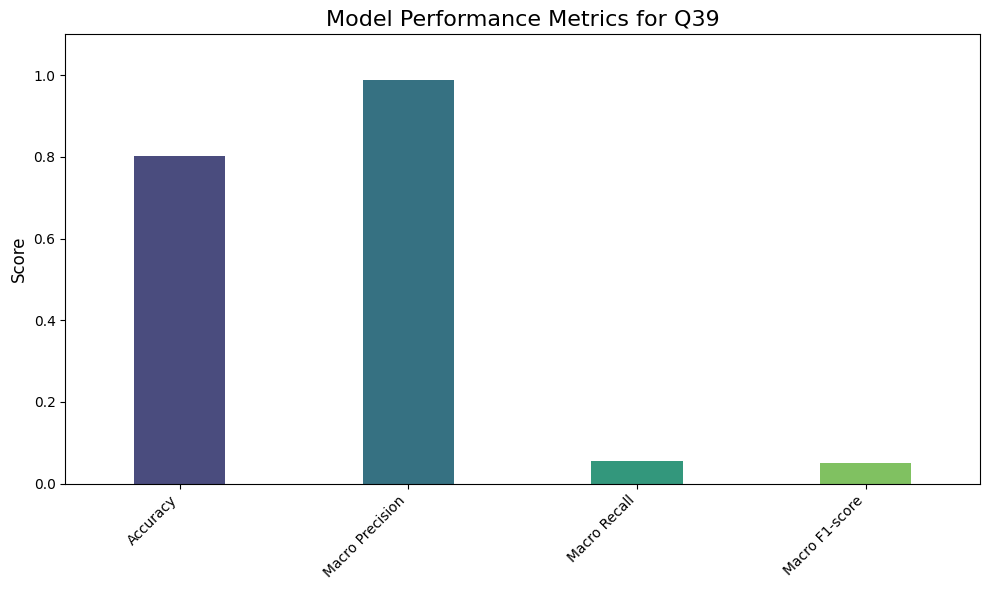

F1-score: 0.713721228884718

Predicting Q43:
AUC calculation failed.


/tmp/ipython-input-1822604481.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.4) # Adjusted width to 0.4


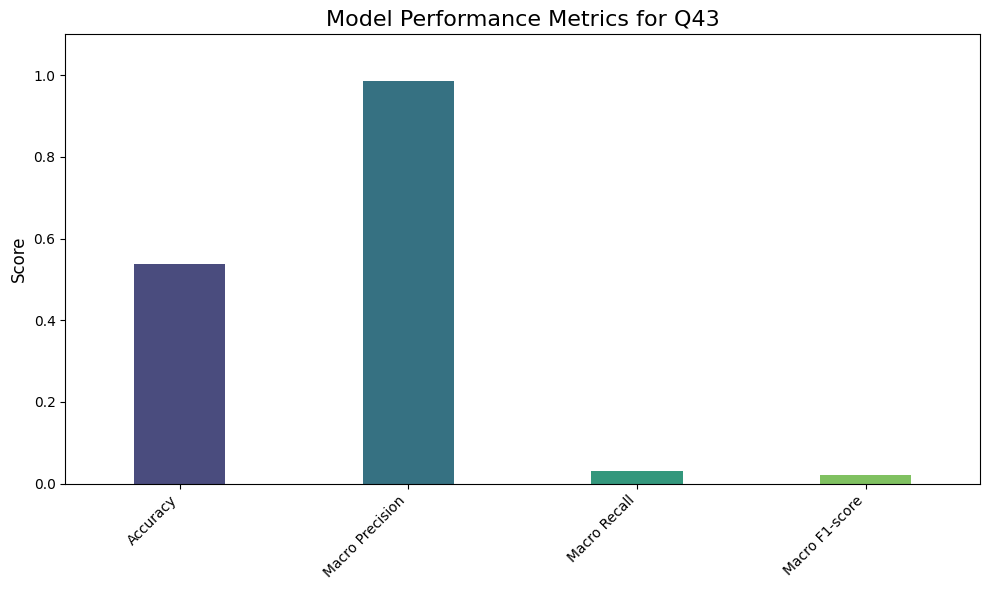

F1-score: 0.37608519504572285

Predicting Q47:
AUC calculation failed.


/tmp/ipython-input-1822604481.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.4) # Adjusted width to 0.4


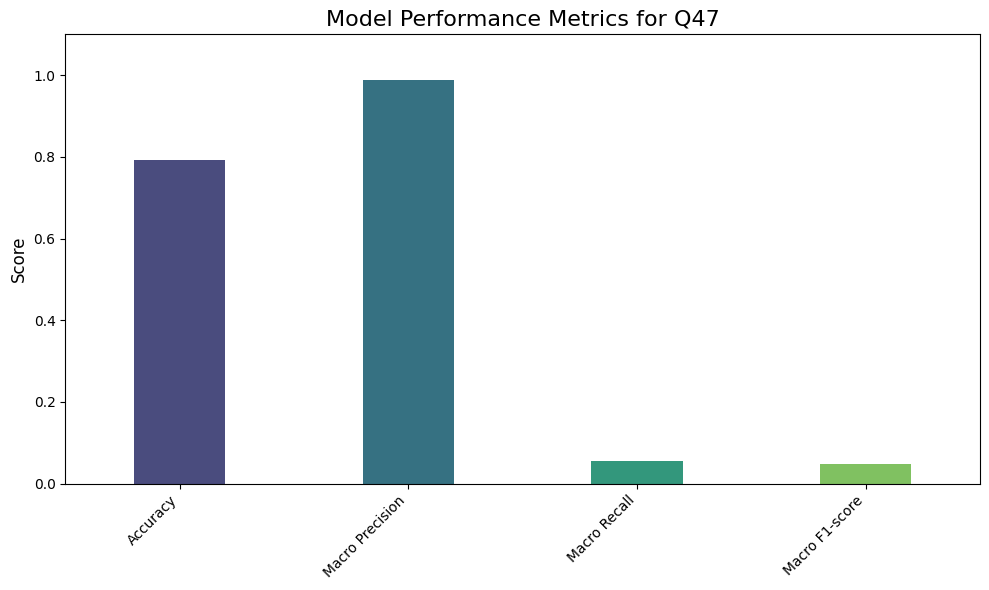

F1-score: 0.700695134061569


In [24]:
# make models to predict target features target_variables = ['Q39', 'Q43', 'Q47'] and evaluate the models to show plots
# bar plots to show  auc, f1 score etc.
# since the label is too long and most are zeros in confusion matrix, only provide the number

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import pandas as pd

# Define features (X) and target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6', 'Q56', 'Q59', 'Q62']
target_variables = ['Q39', 'Q43', 'Q47']

# Loop through each target variable
for target_variable in target_variables:
    print(f"\nPredicting {target_variable}:")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, predictions, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, predictions)

    # Calculate AUC (for binary or multi-class problems)
    auc = None
    try:
        # Check if the target variable is binary or multiclass
        if len(np.unique(y_test)) > 1:
            if len(np.unique(y_test)) > 2:
                auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
            elif len(np.unique(y_test)) == 2:
                 auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except ValueError:
        print("AUC calculation failed.")
    except Exception as e:
        print(f"An error occurred during AUC calculation: {e}")


    # Prepare data for the bar plot
    metrics = ['Accuracy']
    values = [accuracy]
    colors = ['skyblue']

    if auc is not None:
      metrics.append('AUC')
      values.append(auc)
      colors.append('lightcoral')

    # Extract metrics from classification report
    report_df = pd.DataFrame(report).transpose()
    if 'macro avg' in report_df.index:
        metrics.extend(['Macro Precision', 'Macro Recall', 'Macro F1-score'])
        values.extend([report_df.loc['macro avg', 'precision'], report_df.loc['macro avg', 'recall'], report_df.loc['macro avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])
    elif 'weighted avg' in report_df.index:
        metrics.extend(['Weighted Precision', 'Weighted Recall', 'Weighted F1-score'])
        values.extend([report_df.loc['weighted avg', 'precision'], report_df.loc['weighted avg', 'recall'], report_df.loc['weighted avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])


    # Create the bar plot with adjusted bar width and palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics, y=values, palette='viridis', width=0.4) # Adjusted width to 0.4
    plt.title(f'Model Performance Metrics for {target_variable}', fontsize=16)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualize ROC curve (only for binary classification)
    if len(np.unique(y_test)) == 2:
        try:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {target_variable}')
            plt.legend(loc="lower right")
            plt.show()

            #Precision Recall Curve
            precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, marker='.', label='Logistic')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision Recall Curve for {target_variable}')
            plt.legend()
            plt.show()

        except ValueError:
            print("ROC visualization or Precision Recall curve failed. Not a binary classification problem.")
        except Exception as e:
            print(f"An error occurred during ROC/PR curve plotting: {e}")


    # F1-score
    f1 = f1_score(y_test, predictions, average='weighted') # Use weighted for multiclass
    print(f"F1-score: {f1}")


Predicting Q35:
AUC calculation failed.


/tmp/ipython-input-2467913064.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3) # Adjusted width to 0.3


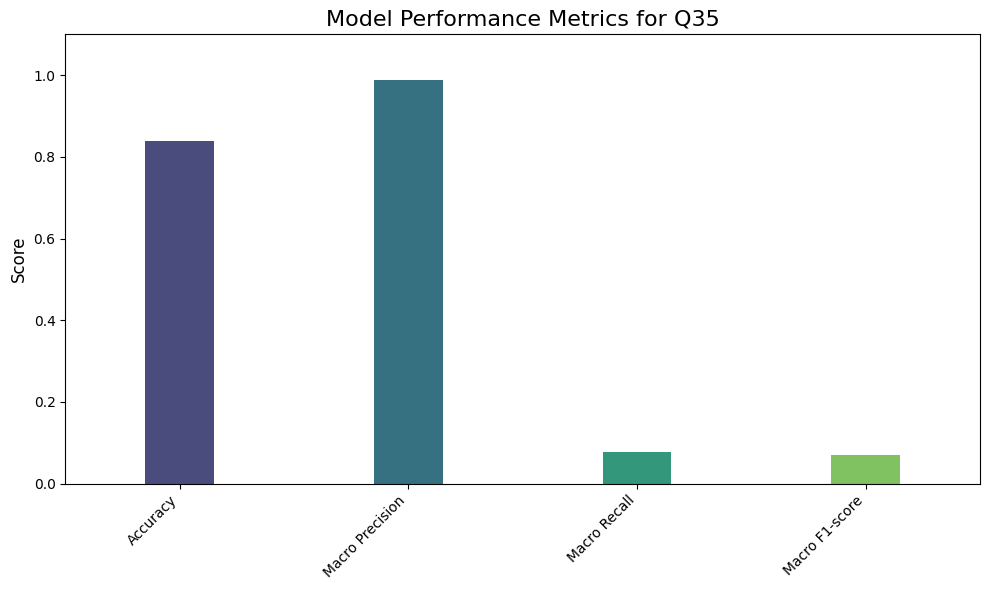

F1-score: 0.7664247701983551

Predicting Q27:
AUC calculation failed.


/tmp/ipython-input-2467913064.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3) # Adjusted width to 0.3


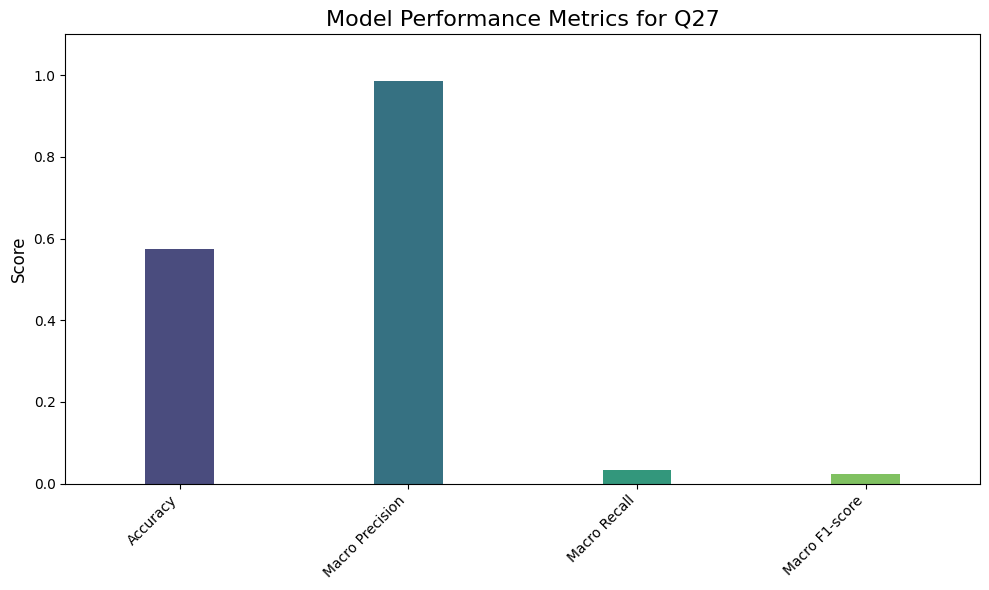

F1-score: 0.4204044740707265

Predicting Q22:
AUC calculation failed.


/tmp/ipython-input-2467913064.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3) # Adjusted width to 0.3


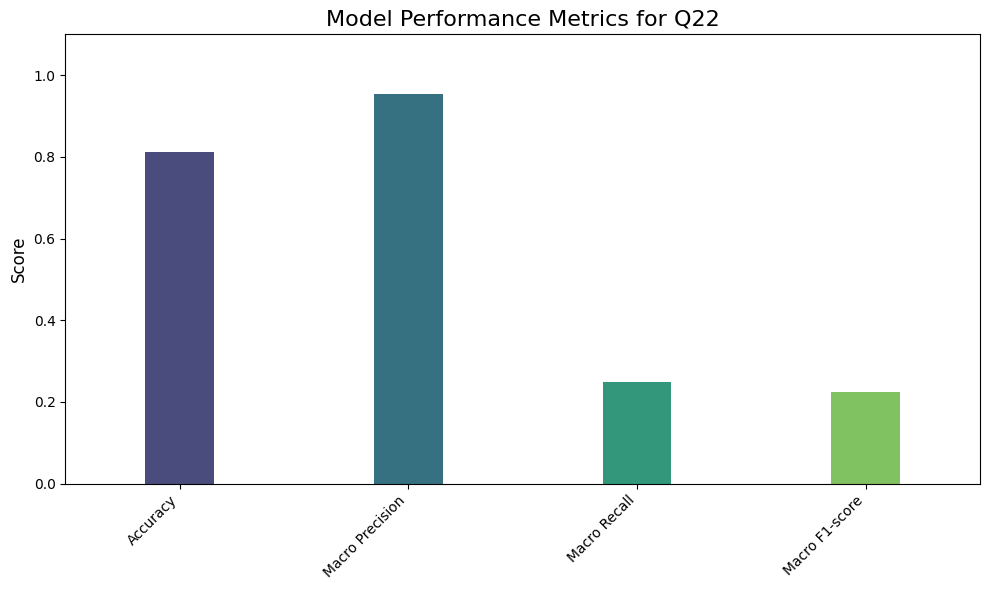

F1-score: 0.726808176100629


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import pandas as pd

# Define features (X) and new target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6', 'Q56', 'Q59', 'Q62']
new_target_variables = ['Q35', 'Q27', 'Q22']

# Loop through each new target variable
for target_variable in new_target_variables:
    print(f"\nPredicting {target_variable}:")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, predictions, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, predictions)

    # Calculate AUC (for binary or multi-class problems)
    auc = None
    try:
        # Check if the target variable is binary or multiclass
        if len(np.unique(y_test)) > 1:
            if len(np.unique(y_test)) > 2:
                auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
            elif len(np.unique(y_test)) == 2:
                 auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except ValueError:
        print("AUC calculation failed.")
    except Exception as e:
        print(f"An error occurred during AUC calculation: {e}")


    # Prepare data for the bar plot
    metrics = ['Accuracy']
    values = [accuracy]
    colors = ['skyblue']

    if auc is not None:
      metrics.append('AUC')
      values.append(auc)
      colors.append('lightcoral')

    # Extract metrics from classification report
    report_df = pd.DataFrame(report).transpose()
    if 'macro avg' in report_df.index:
        metrics.extend(['Macro Precision', 'Macro Recall', 'Macro F1-score'])
        values.extend([report_df.loc['macro avg', 'precision'], report_df.loc['macro avg', 'recall'], report_df.loc['macro avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])
    elif 'weighted avg' in report_df.index:
        metrics.extend(['Weighted Precision', 'Weighted Recall', 'Weighted F1-score'])
        values.extend([report_df.loc['weighted avg', 'precision'], report_df.loc['weighted avg', 'recall'], report_df.loc['weighted avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])


    # Create the bar plot with adjusted bar width and palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics, y=values, palette='viridis', width=0.3) # Adjusted width to 0.3
    plt.title(f'Model Performance Metrics for {target_variable}', fontsize=16)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # Visualize ROC curve (only for binary classification)
    if len(np.unique(y_test)) == 2:
        try:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {target_variable}')
            plt.legend(loc="lower right")
            plt.show()

            #Precision Recall Curve
            precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, marker='.', label='Logistic')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision Recall Curve for {target_variable}')
            plt.legend()
            plt.show()

        except ValueError:
            print("ROC visualization or Precision Recall curve failed. Not a binary classification problem.")
        except Exception as e:
            print(f"An error occurred during ROC/PR curve plotting: {e}")


    # F1-score
    f1 = f1_score(y_test, predictions, average='weighted') # Use weighted for multiclass
    print(f"F1-score: {f1}")

In [28]:


def extract_numbered_lat_lng_multiple(text):
    """
    Extracts latitude and longitude for all numbered locations from the text.

    Args:
      text: The input string.

    Returns:
      A list of tuples, each containing (number, latitude, longitude) or an empty list if none found.
    """
    locations = []
    if isinstance(text, str):
        # Find all occurrences of number:{"lat":...,"lng":...}
        matches = re.findall(r'(\d+):\{\"lat\":(\-?\d+\.?\d*),\"lng\":(\-?\d+\.?\d*)\}', text)
        for match in matches:
            number = int(match[0])
            lat = float(match[1])
            lng = float(match[2])
            locations.append((number, lat, lng))
    return locations

# Apply the function to the 'Q31' column
df['Q31_all_numbered_coords'] = df['Q31'].apply(extract_numbered_lat_lng_multiple)

# Create a list of all individual location points for Q31 with their numbers
all_q31_locations_numbered = []
for index, row in df.iterrows():
    all_q31_locations_numbered.extend(row['Q31_all_numbered_coords'])

# Create a DataFrame from the extracted Q31 locations with numbers
df_q31_locations_numbered = pd.DataFrame(all_q31_locations_numbered, columns=['number', 'lat', 'lng']).dropna(subset=['lat', 'lng'])

# --- Plot Q31 locations on a map with clustering ---
print(f"Number of Q31 locations to plot: {len(df_q31_locations_numbered)}")
if not df_q31_locations_numbered.empty:
    avg_lat_q31 = df_q31_locations_numbered['lat'].mean()
    avg_lng_q31 = df_q31_locations_numbered['lng'].mean()
    m_q31 = folium.Map(location=[avg_lat_q31, avg_lng_q31], zoom_start=12)

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m_q31)

    # Add markers for Q31 locations with tooltips to the cluster
    for index, row in df_q31_locations_numbered.iterrows():
        number = row['number']
        lat = row['lat']
        lng = row['lng']

        folium.Marker(
            [lat, lng],
            icon=folium.Icon(icon='info-sign'), # Using 'info-sign' icon
            tooltip=f"Q31 - Number: {number}" # Tooltip indicating the number
        ).add_to(marker_cluster) # Add to the marker cluster

    print("\nMap of Q31 Locations:")
    display(m_q31)
else:
    print("\nNo valid coordinates found in the 'Q31' column to plot.")

Number of Q31 locations to plot: 378

Map of Q31 Locations:


In [ ]:
m_q31.save('/content/drive/My Drive/q31_numbered_locations_map.html')
print("Map exported to q31_numbered_locations_map.html")

Map exported to q31_numbered_locations_map.html



Predicting Q41:


/tmp/ipython-input-1331455096.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3


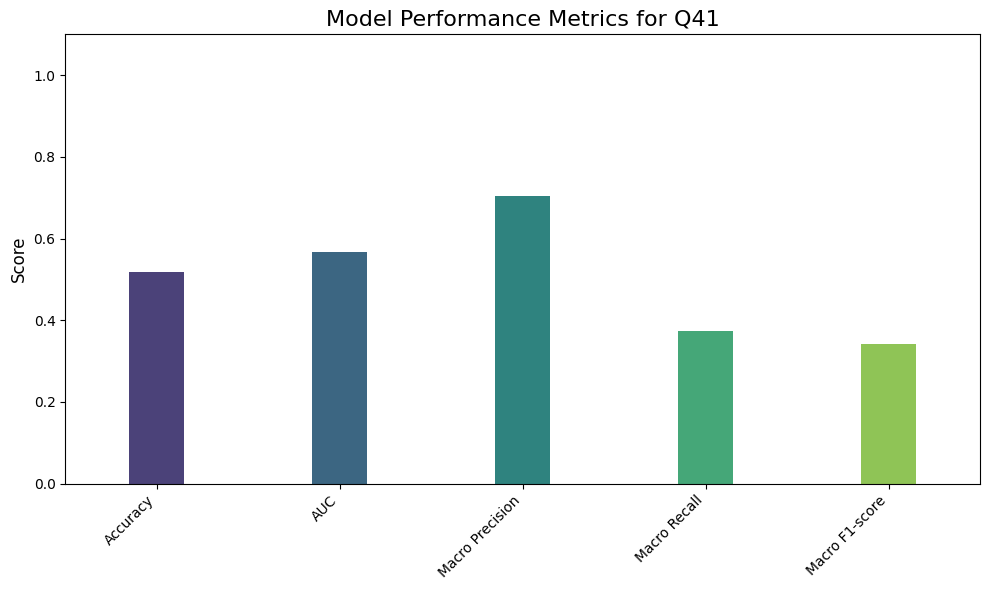

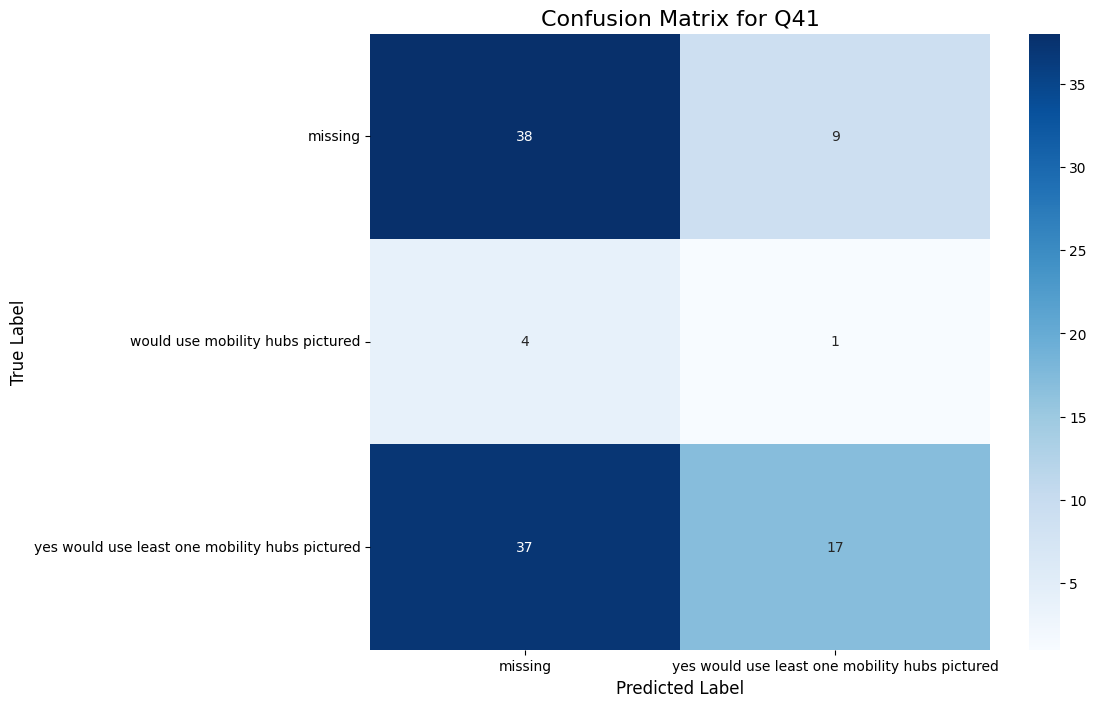

F1-score: 0.48128182090446237

Predicting Q45:


/tmp/ipython-input-1331455096.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3


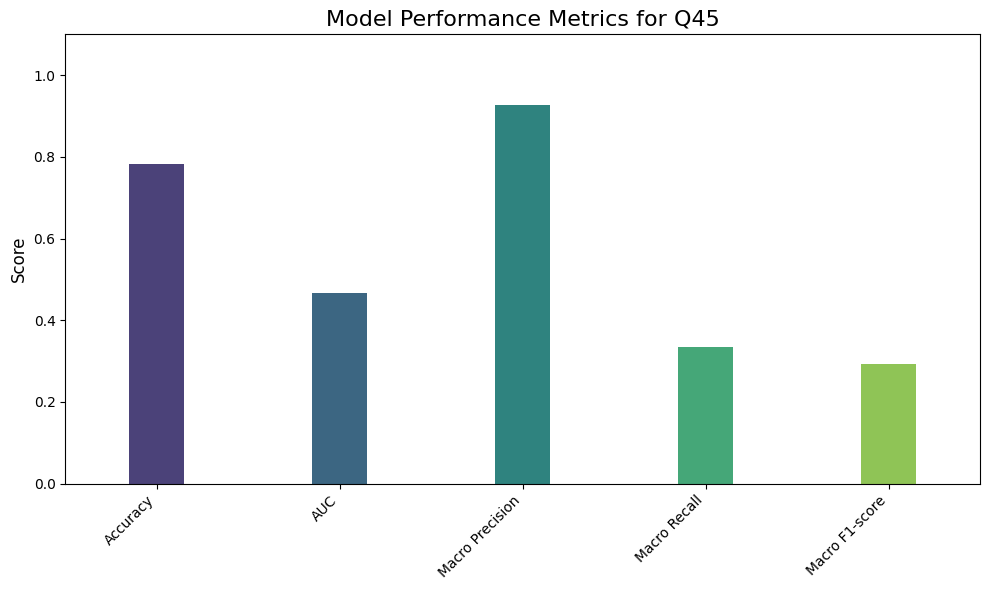

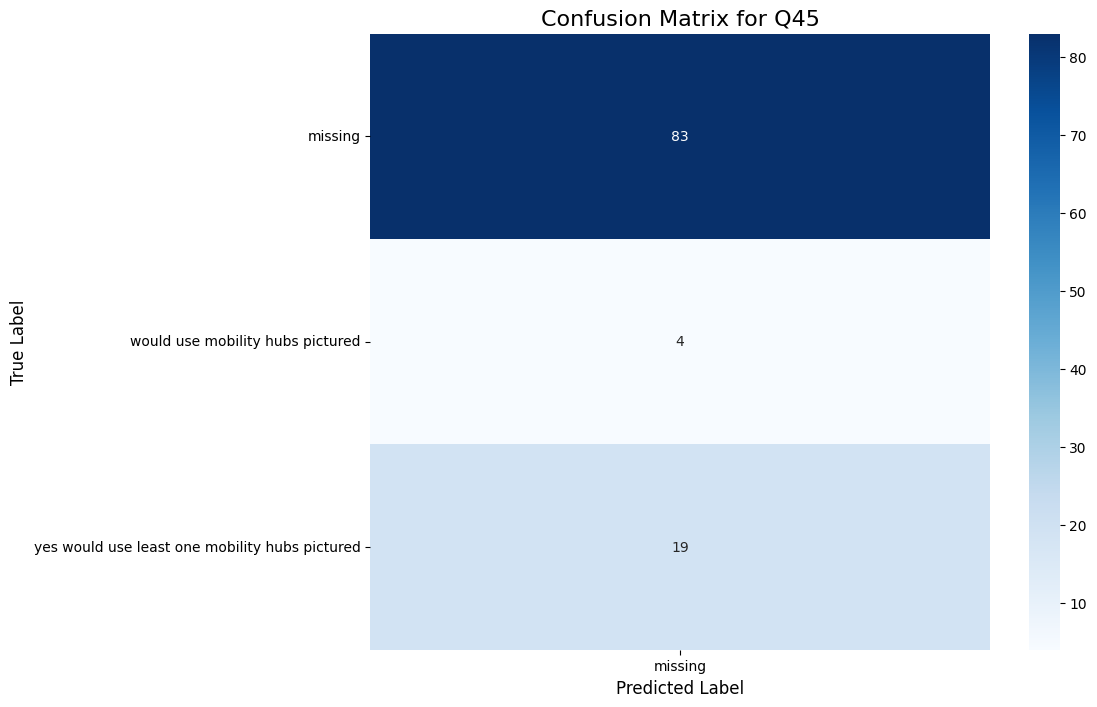

F1-score: 0.6877308575421783

Predicting Q46:
AUC calculation failed.


/tmp/ipython-input-1331455096.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3


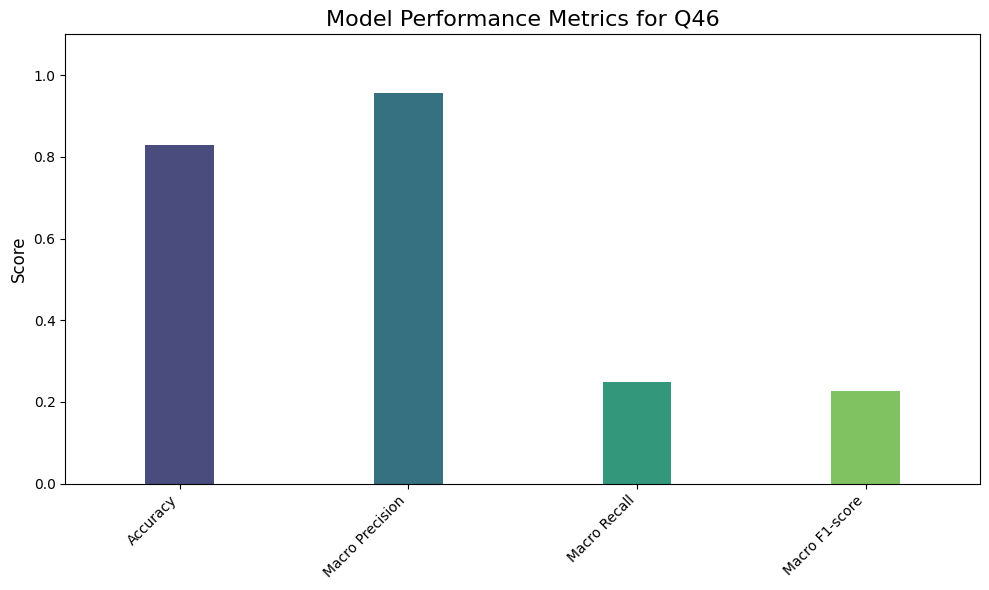

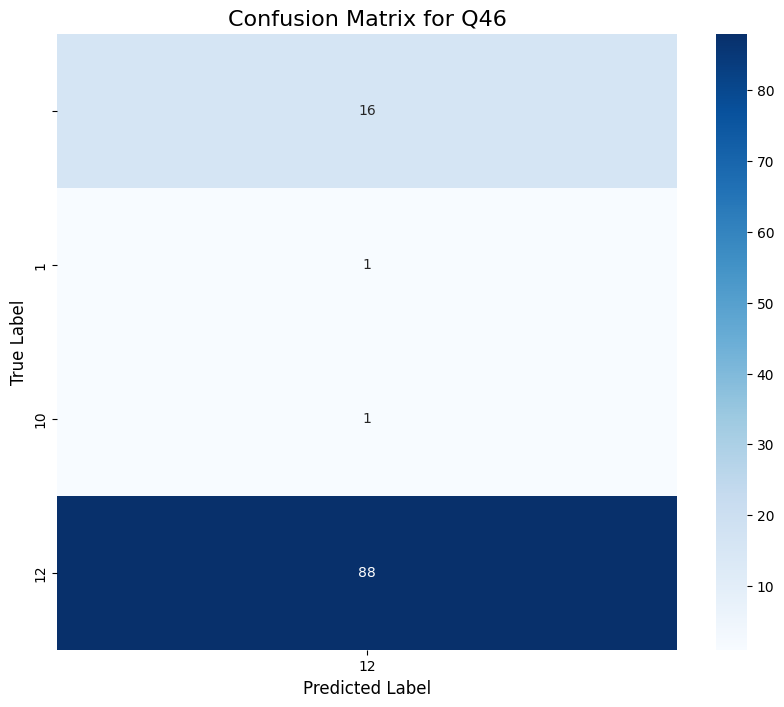

F1-score: 0.7531608636452052


In [ ]:
# Use several columns  ( Q50, Q54, Q60, Q59, Q62) of  the data frame extracted_df to predict Q41or Q45 or Q46 (make 3 sets of plots)
# make a model and get the predictions. provide auc, precision and other evaluations. after getting the model predictions, visualize the roc, precision, f1 score etc.
# use plots to visualize the results.
# also provide label text in the confusion matrix, instead of just the numbering

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report


# Define features (X) and target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q54', 'Q60', 'Q59', 'Q62']
target_variables = ['Q41', 'Q45', 'Q46']

# Loop through each target variable
for target_variable in target_variables:
    print(f"\nPredicting {target_variable}:")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, predictions, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, predictions)

    # Calculate AUC (for binary or multi-class problems)
    auc_score = None
    try:
        # Check if the target variable is binary or multiclass
        if len(np.unique(y_test)) > 1:
            if len(np.unique(y_test)) > 2:
                auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
            elif len(np.unique(y_test)) == 2:
                 auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except ValueError:
        print("AUC calculation failed.")

    # Prepare data for the bar plot
    metrics = ['Accuracy']
    values = [accuracy]
    colors = ['skyblue']

    if auc_score is not None:
      metrics.append('AUC')
      values.append(auc_score)
      colors.append('lightcoral')

    # Extract metrics from classification report
    report_df = pd.DataFrame(report).transpose()
    if 'macro avg' in report_df.index:
        metrics.extend(['Macro Precision', 'Macro Recall', 'Macro F1-score'])
        values.extend([report_df.loc['macro avg', 'precision'], report_df.loc['macro avg', 'recall'], report_df.loc['macro avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])
    elif 'weighted avg' in report_df.index:
        metrics.extend(['Weighted Precision', 'Weighted Recall', 'Weighted F1-score'])
        values.extend([report_df.loc['weighted avg', 'precision'], report_df.loc['weighted avg', 'recall'], report_df.loc['weighted avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3
    plt.title(f'Model Performance Metrics for {target_variable}', fontsize=16)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    classes = le.classes_

    # Find indices of non-zero rows and columns in the confusion matrix
    non_zero_rows = np.where(cm.sum(axis=1) > 0)[0]
    non_zero_cols = np.where(cm.sum(axis=0) > 0)[0]

    # Filter the confusion matrix to only show rows and columns with non-zero sums
    cm_filtered = cm[non_zero_rows, :][:, non_zero_cols]

    # Get the corresponding labels for the filtered rows and columns
    filtered_row_labels = classes[non_zero_rows]
    filtered_col_labels = classes[non_zero_cols]


    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
                xticklabels=filtered_col_labels, yticklabels=filtered_row_labels)
    plt.title(f'Confusion Matrix for {target_variable}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

    # Visualize ROC curve (only for binary classification)
    if len(np.unique(y_test)) == 2:
        try:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {target_variable}')
            plt.legend(loc="lower right")
            plt.show()

            #Precision Recall Curve
            precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, marker='.', label='Logistic')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision Recall Curve for {target_variable}')
            plt.legend()
            plt.show()

        except ValueError:
            print("ROC visualization or Precision Recall curve failed. Not a binary classification problem.")

    # F1-score
    f1 = f1_score(y_test, predictions, average='weighted') # Use weighted for multiclass
    print(f"F1-score: {f1}")

In [30]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({np.int64(9): 307, np.int64(0): 105, np.int64(3): 3, np.int64(2): 2, np.int64(1): 2, np.int64(6): 1, np.int64(8): 1, np.int64(4): 1, np.int64(5): 1})
Counter({np.int64(9): 88, np.int64(0): 16, np.int64(7): 1, np.int64(4): 1})


## Confusion matrix for Q46 and others

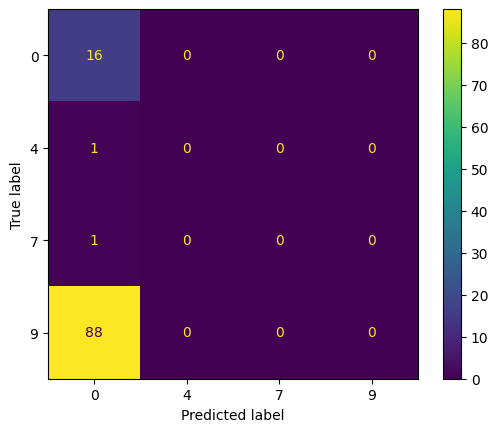

In [31]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Convert probabilities to predicted labels
# For binary classification, y_prob is likely a 1D array of probabilities for the positive class
# We can threshold these probabilities to get the predicted labels
y_pred = (y_prob > 0.5).astype(int)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


Generating Confusion Matrix for Q41:


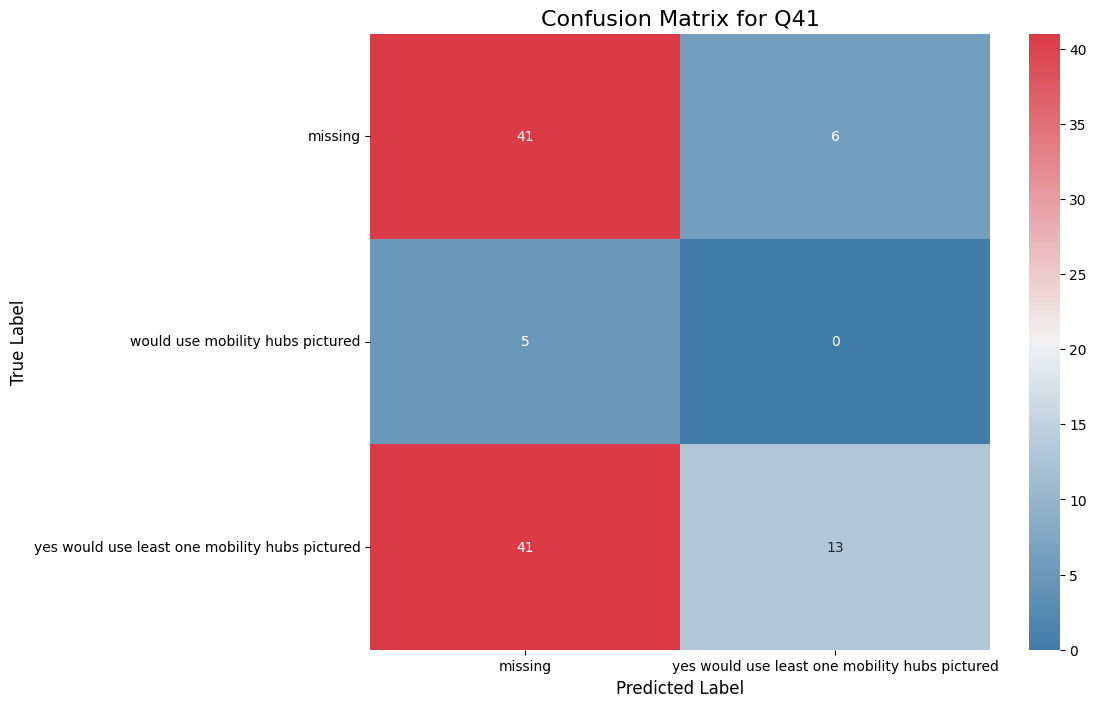


Generating Confusion Matrix for Q45:


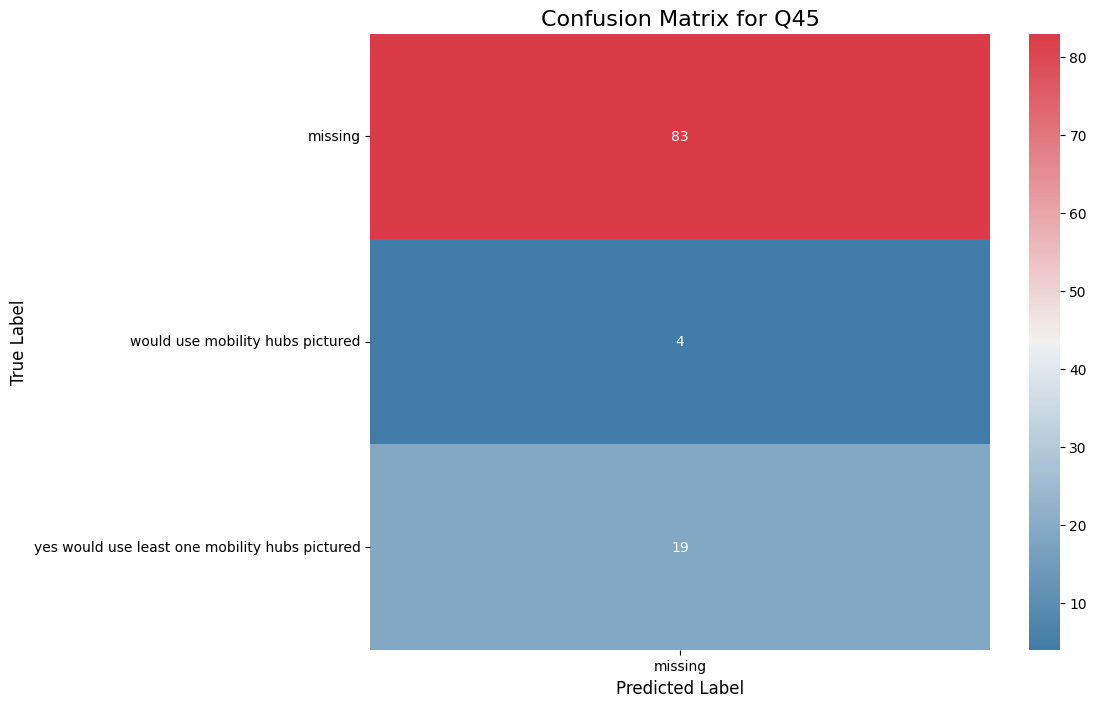


Generating Confusion Matrix for Q46:


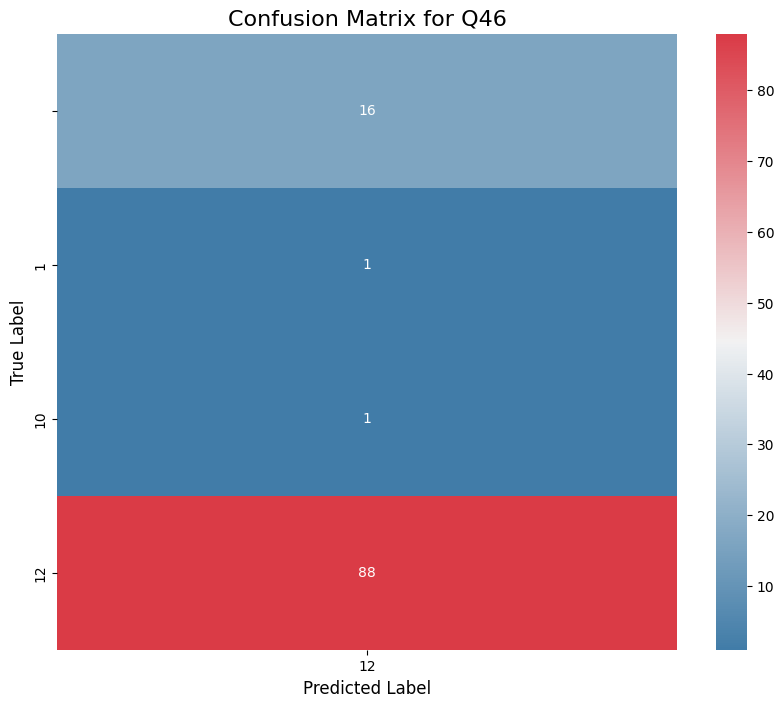

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define features (X) and target variables (y) - including the newly requested ones
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6', 'Q56', 'Q59', 'Q62']
all_target_variables = ['Q41', 'Q45', 'Q46'] # Include all calculated targets

# Define a customized color map (e.g., using a diverging colormap)
custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Loop through each target variable to generate and plot confusion matrices
for target_variable in all_target_variables:
    print(f"\nGenerating Confusion Matrix for {target_variable}:")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example) - needed to get predictions
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Confusion Matrix with labels
    cm = confusion_matrix(y_test, predictions)
    classes = le.classes_  # Get the original labels

    # Find indices of non-zero rows and columns in the confusion matrix
    non_zero_rows = np.where(cm.sum(axis=1) > 0)[0]
    non_zero_cols = np.where(cm.sum(axis=0) > 0)[0]

    # Filter the confusion matrix to only show rows and columns with non-zero sums
    cm_filtered = cm[non_zero_rows, :][:, non_zero_cols]

    # Get the corresponding labels for the filtered rows and columns
    filtered_row_labels = classes[non_zero_rows]
    filtered_col_labels = classes[non_zero_cols]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_filtered, annot=True, fmt='d', cmap=custom_cmap, # Use the customized colormap
                xticklabels=filtered_col_labels, yticklabels=filtered_row_labels)
    plt.title(f'Confusion Matrix for {target_variable}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()


Predicting Q41:


/tmp/ipython-input-1088927508.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3


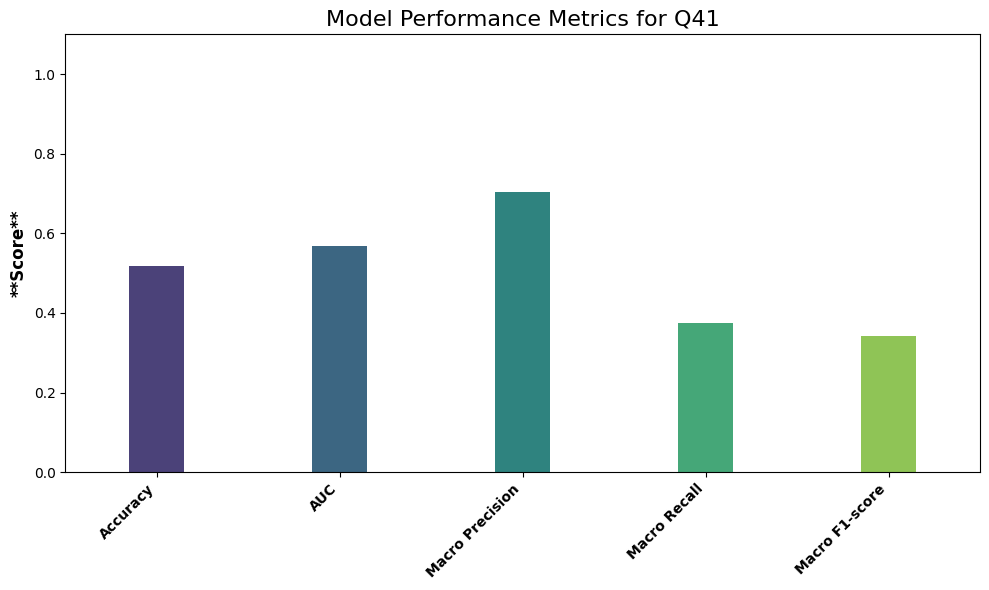

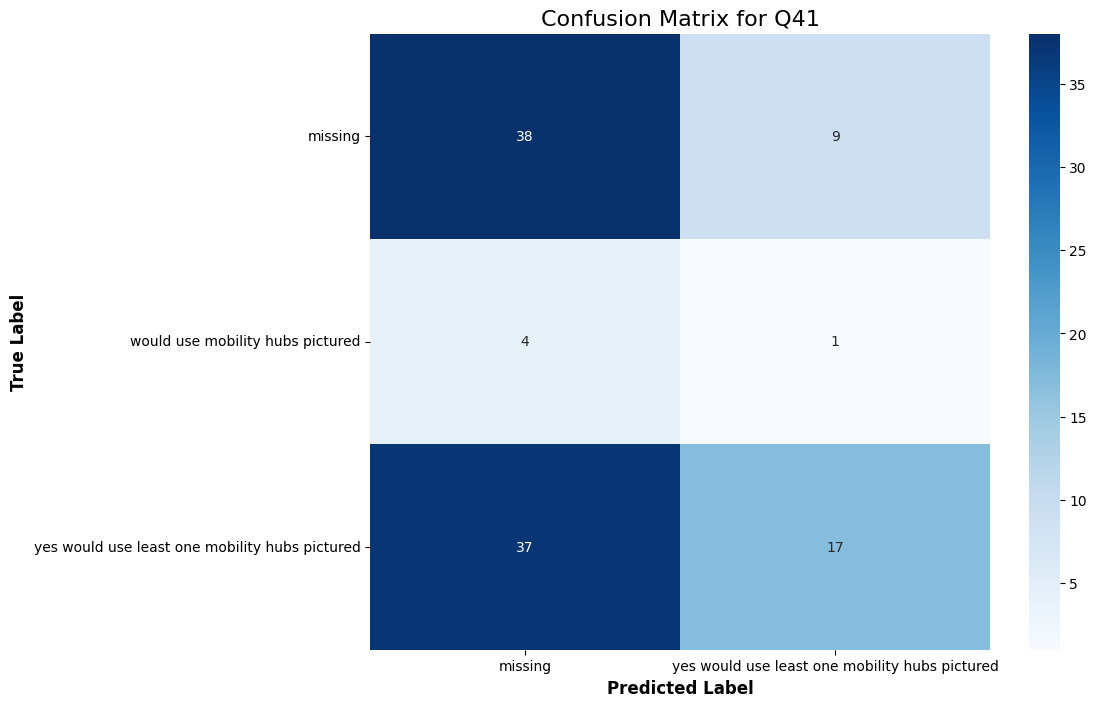

F1-score: 0.48128182090446237

Predicting Q45:


/tmp/ipython-input-1088927508.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3


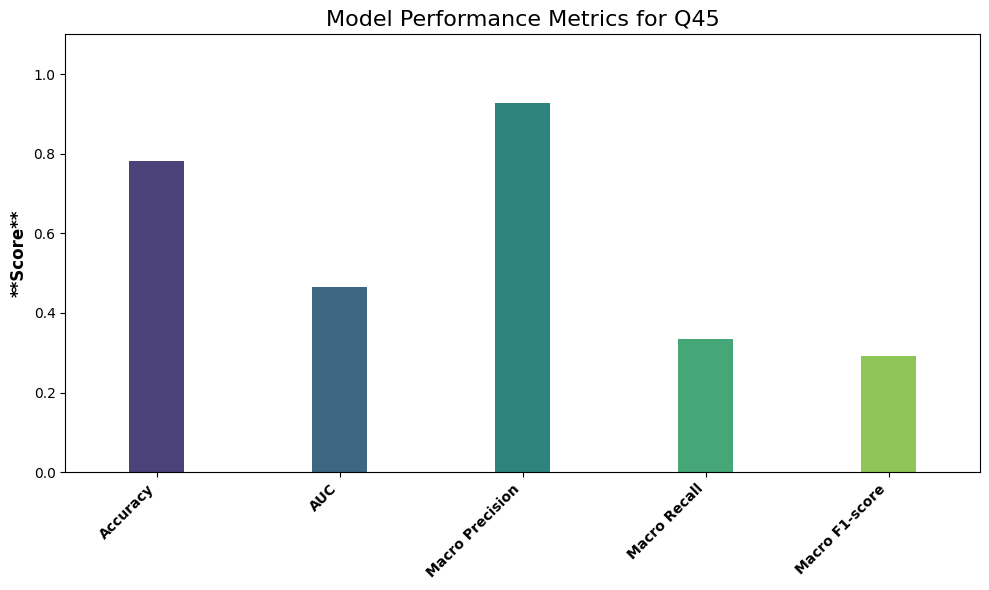

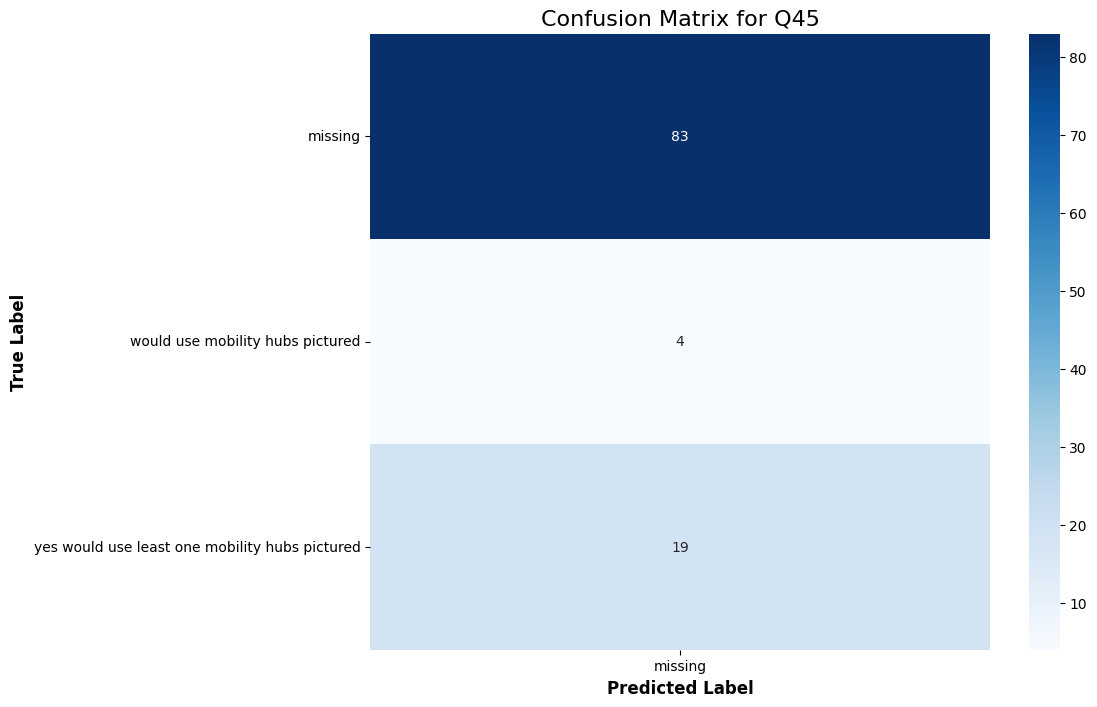

F1-score: 0.6877308575421783

Predicting Q46:
AUC calculation failed.


/tmp/ipython-input-1088927508.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3


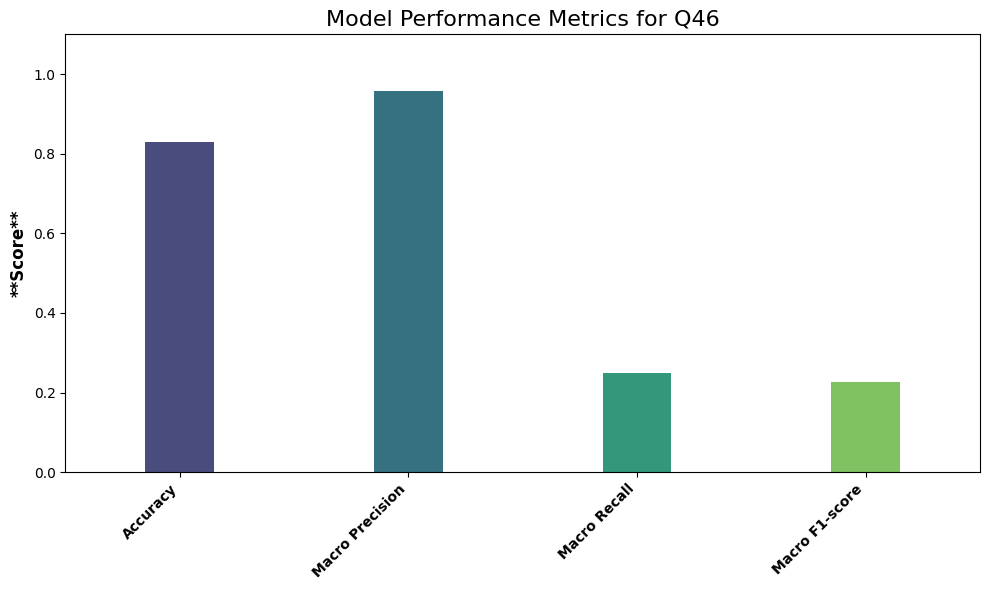

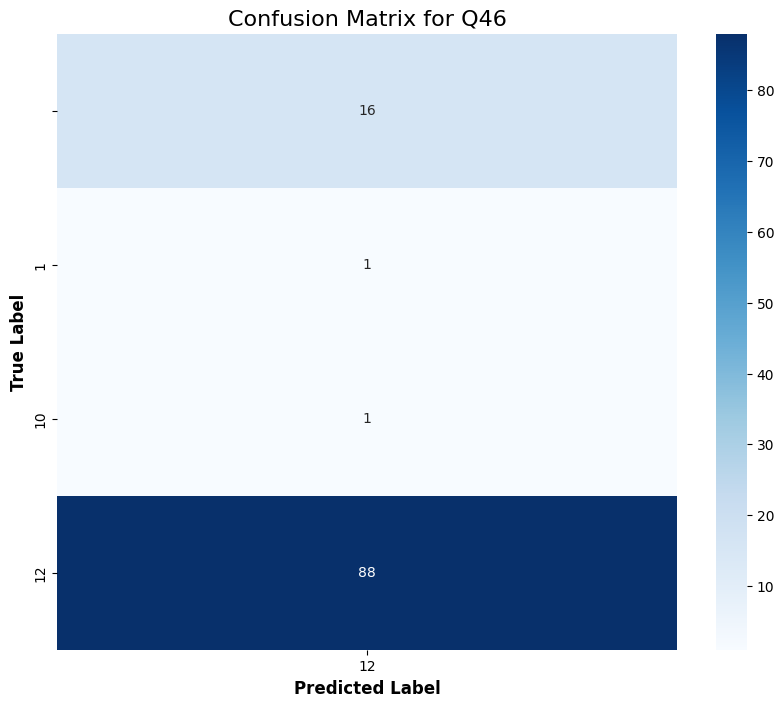

F1-score: 0.7531608636452052


In [34]:
# visualize above results using different plots, and in the confusion matrix, provide labels instead of numbers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report


# Define features (X) and target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q54', 'Q60', 'Q59', 'Q62']
target_variables = ['Q41', 'Q45', 'Q46']

# Loop through each target variable
for target_variable in target_variables:
    print(f"\nPredicting {target_variable}:")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, predictions, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, predictions)

    # Calculate AUC (for binary or multi-class problems)
    auc_score = None
    try:
        # Check if the target variable is binary or multiclass
        if len(np.unique(y_test)) > 1:
            if len(np.unique(y_test)) > 2:
                auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
            elif len(np.unique(y_test)) == 2:
                 auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except ValueError:
        print("AUC calculation failed.")
    except Exception as e:
        print(f"An error occurred during AUC calculation: {e}")


    # Prepare data for the bar plot
    metrics = ['Accuracy']
    values = [accuracy]
    colors = ['skyblue']

    if auc_score is not None:
      metrics.append('AUC')
      values.append(auc_score)
      colors.append('lightcoral')

    # Extract metrics from classification report
    report_df = pd.DataFrame(report).transpose()
    if 'macro avg' in report_df.index:
        metrics.extend(['Macro Precision', 'Macro Recall', 'Macro F1-score'])
        values.extend([report_df.loc['macro avg', 'precision'], report_df.loc['macro avg', 'recall'], report_df.loc['macro avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])
    elif 'weighted avg' in report_df.index:
        metrics.extend(['Weighted Precision', 'Weighted Recall', 'Weighted F1-score'])
        values.extend([report_df.loc['weighted avg', 'precision'], report_df.loc['weighted avg', 'recall'], report_df.loc['weighted avg', 'f1-score']])
        colors.extend(['lightgreen', 'gold', 'salmon'])

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics, y=values, palette='viridis', width=0.3)  # Use 'viridis' and set width to 0.3
    plt.title(f'Model Performance Metrics for {target_variable}', fontsize=16)
    plt.ylabel('**Score**', fontsize=12, fontweight='bold') # Make y-label bold
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45, ha='right', fontweight='bold') # Make x-labels bold
    plt.tight_layout()
    plt.show()

    # Confusion Matrix with labels
    cm = confusion_matrix(y_test, predictions)
    classes = le.classes_  # Get the original labels

    # Find indices of non-zero rows and columns in the confusion matrix
    non_zero_rows = np.where(cm.sum(axis=1) > 0)[0]
    non_zero_cols = np.where(cm.sum(axis=0) > 0)[0]

    # Filter the confusion matrix to only show rows and columns with non-zero sums
    cm_filtered = cm[non_zero_rows, :][:, non_zero_cols]

    # Get the corresponding labels for the filtered rows and columns
    filtered_row_labels = classes[non_zero_rows]
    filtered_col_labels = classes[non_zero_cols]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
                xticklabels=filtered_col_labels, yticklabels=filtered_row_labels)
    plt.title(f'Confusion Matrix for {target_variable}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold') # Make x-label bold
    plt.ylabel('True Label', fontsize=12, fontweight='bold') # Make y-label bold
    plt.show()

    # Visualize ROC curve (only for binary classification)
    if len(np.unique(y_test)) == 2:
        try:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {target_variable}')
            plt.legend(loc="lower right")
            plt.show()

            #Precision Recall Curve
            precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
            plt.plot(recall, precision, marker='.', label='Logistic')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision Recall Curve for {target_variable}')
            plt.legend()
            plt.show()

        except ValueError:
            print("ROC visualization or Precision Recall curve failed. Not a binary classification problem.")

    # F1-score
    f1 = f1_score(y_test, predictions, average='weighted') # Use weighted for multiclass
    print(f"F1-score: {f1}")

In [35]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 8.8 MB/s eta 0:00:00



Feature Importance Analysis for Predicting Q39 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
neutral       0.233586
strongly      0.231755
disagree      0.230276
agree         0.185752
scooter       0.146967
moped         0.146885
yes           0.120613
currently     0.105861
car           0.097085
missing       0.069755
incapable     0.060218
physically    0.060218
riding        0.051020
bike          0.051020
electric      0.051020
travel        0.050536
alone         0.039543
outside       0.039543
difficult     0.039543
makes         0.039543
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q39 (based on top token influence):
Q50_6    132.078490
Q50_1    131.235560
Q52_6    129.524299
Q50_3    128.320670
Q50_5    127.493396
Q50_2    127.236283
Q52_2    126.349978
Q50_4    124.363331
Q52_3    123.616785
Q52_1    122.763577
Q52_5    122.577910
Q52_4    1

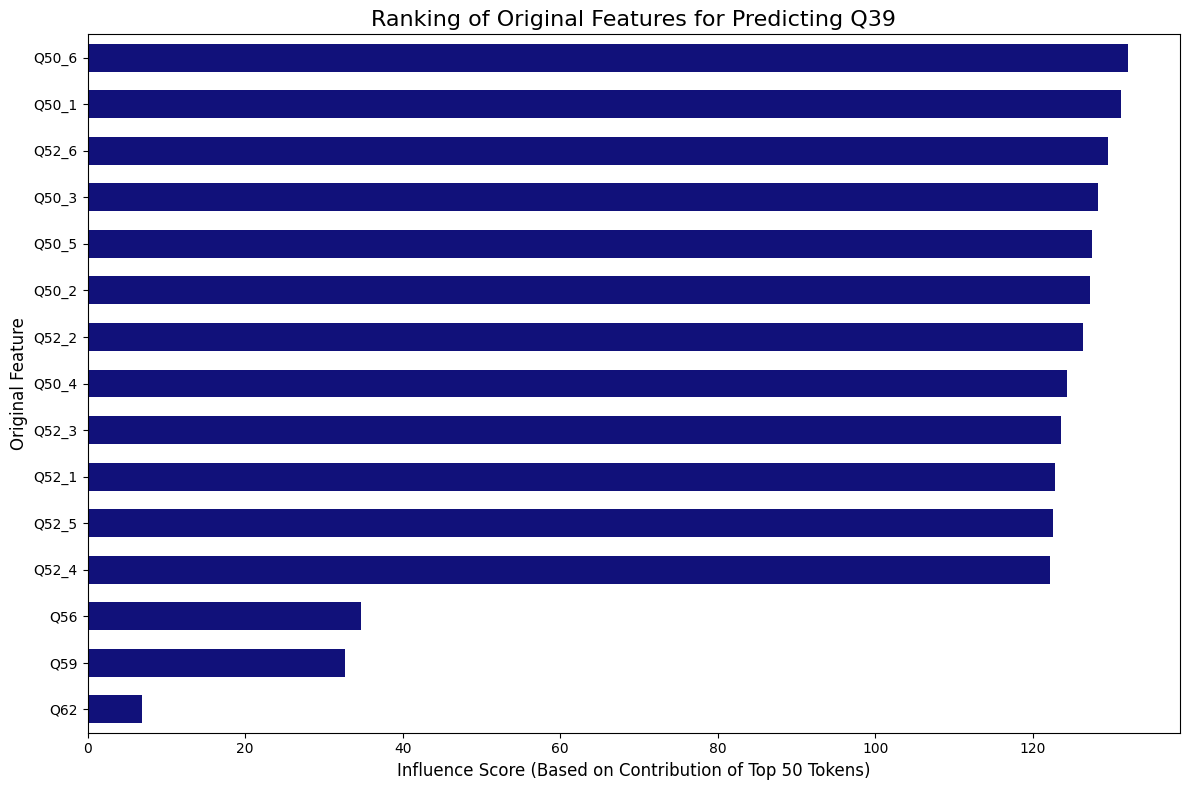


Feature Importance Analysis for Predicting Q43 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
strongly      0.230605
disagree      0.178131
agree         0.173923
neutral       0.162649
car           0.116182
yes           0.109168
currently     0.092296
scooter       0.082694
moped         0.080382
missing       0.058425
incapable     0.044270
physically    0.044270
retired       0.039802
travel        0.039134
volunteer     0.029505
intern        0.029505
unpaid        0.029505
minutes       0.028337
walking       0.028337
bike          0.027411
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q43 (based on top token influence):
Q50_6    119.915535
Q50_1    116.288585
Q50_3    115.756020
Q50_5    115.397610
Q52_2    113.587918
Q50_2    112.856002
Q52_3    108.802203
Q52_6    107.841105
Q50_4    107.451664
Q52_5    107.346522
Q52_1    106.770869
Q52_4    1

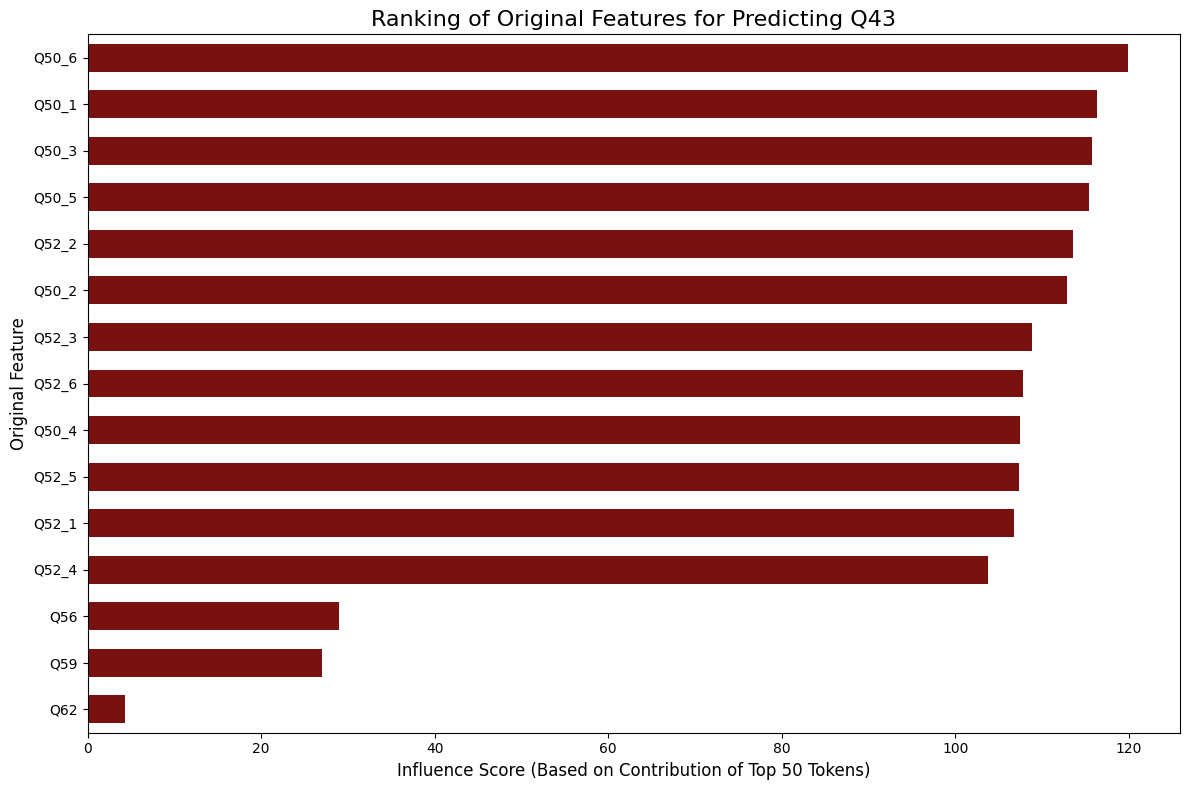


Feature Importance Analysis for Predicting Q47 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
strongly      0.224919
agree         0.175126
neutral       0.146909
disagree      0.142041
car           0.095328
currently     0.091274
missing       0.090852
yes           0.088263
scooter       0.073783
moped         0.063923
incapable     0.063573
physically    0.063573
unpaid        0.062184
intern        0.062184
volunteer     0.062184
bike          0.041673
electric      0.041673
riding        0.041673
walking       0.034108
minutes       0.034108
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q47 (based on top token influence):
Q50_6    116.331933
Q50_3    112.213904
Q50_5    111.965343
Q50_1    111.122343
Q52_2    109.588957
Q50_2    108.651076
Q52_3    104.198877
Q52_5    102.710327
Q50_4    101.354829
Q52_1    101.347838
Q52_4     97.284460
Q52_6     

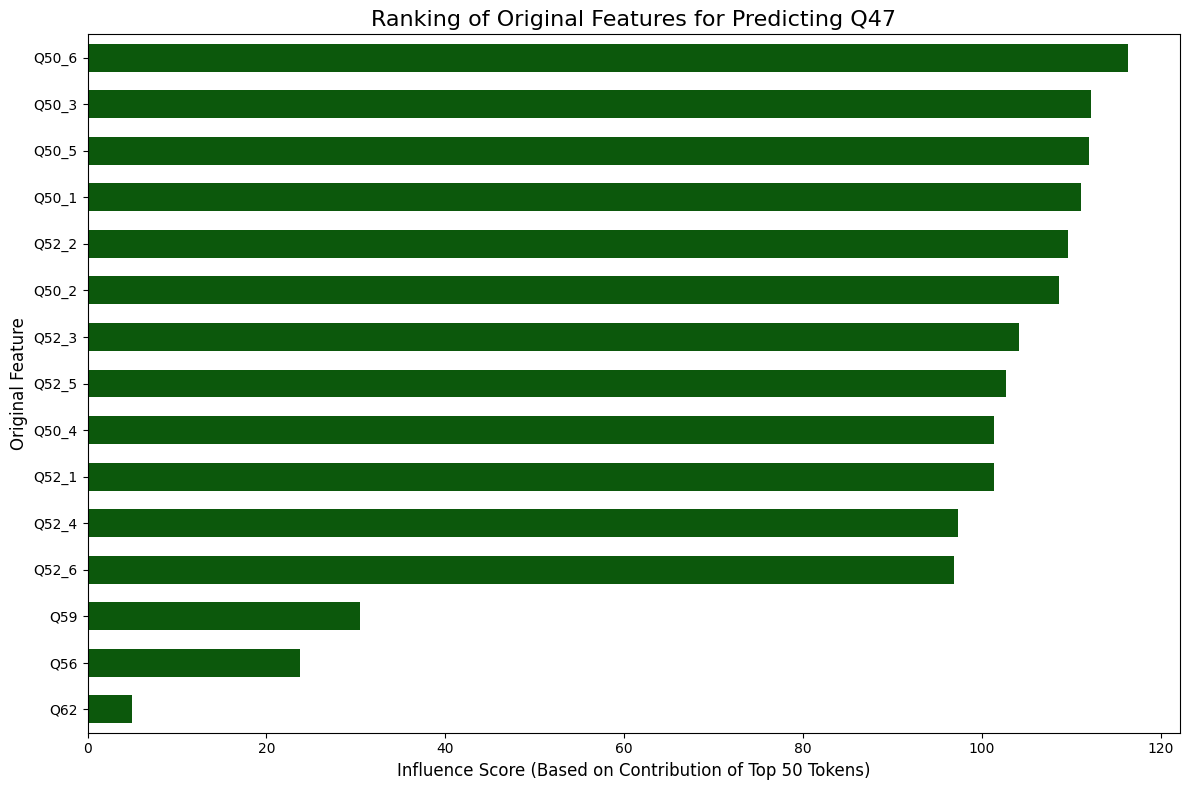

In [37]:


# Loop through each target variable to perform feature importance analysis
# Define features (X) and target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6', 'Q56', 'Q59', 'Q62']
target_variables = ['Q39', 'Q43', 'Q47'] # Specify the target variables you want to analyze feature importance for

# Define a dictionary to map target variables to colors
target_color_map = {
    'Q39': 'darkblue',
    'Q43': 'darkred',
    'Q47': 'darkgreen'
}

for target_variable in target_variables:
    print(f"\nFeature Importance Analysis for Predicting {target_variable} (Based on Original Features):")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Get feature names (tokens) from the vectorizer
    token_names = vectorizer.get_feature_names_out()

    # Get model coefficients
    # For multi-class, Logistic Regression has one set of coefficients per class vs. rest.
    # We'll look at the average absolute coefficient value across all classes.
    if len(model.coef_.shape) > 1: # Multi-class
        coefs = np.mean(np.abs(model.coef_), axis=0)
    else: # Binary class
        coefs = np.abs(model.coef_[0]) # Use absolute value for magnitude

    # Create a mapping of token importance based on coefficient magnitude
    token_importance = pd.Series(coefs, index=token_names)
    token_importance = token_importance.sort_values(ascending=False)

    print("\nTop 20 most influential tokens based on model coefficients:")
    print(token_importance.head(20))

    # Now, we will relate these influential tokens back to the original features.
    # This is done by calculating a score for each original feature based on the
    # total TF-IDF score of the top tokens that appear within that feature.

    # Consider top N tokens for this analysis (e.g., top 50 or 100)
    num_top_tokens = 50
    top_tokens = token_importance.head(num_top_tokens).index.tolist()

    feature_token_scores = {}
    for feature in features:
        # Create a temporary TF-IDF vectorizer with the vocabulary limited to top tokens
        # This ensures we only consider the contribution of the most influential tokens
        temp_vectorizer = TfidfVectorizer(vocabulary=top_tokens)
        # Fit and transform the single feature column (ensure it's string type)
        # We use the raw column before previous preprocessing to get original token counts/tfidf
        # Need to handle potential NaNs by filling with empty string
        feature_vectorized = temp_vectorizer.fit_transform(df[feature].fillna('').astype(str))
        # Sum the TF-IDF scores for each of the top tokens within this feature
        token_sum_tfidf_in_feature = np.sum(feature_vectorized.toarray(), axis=0)
        # Map the sum of TF-IDF back to the token names
        feature_token_scores[feature] = pd.Series(token_sum_tfidf_in_feature, index=top_tokens)

    print("\nRanking original features based on the presence and influence of top tokens within them:")

    # Calculate a score for each original feature based on the total importance of top tokens within it
    # Weighted sum of TF-IDF scores of top tokens by their overall importance
    feature_scores = {}
    for feature in features:
         # Ensure we are only using the top_tokens from the overall token_importance
        relevant_token_importance = token_importance[top_tokens]
        # Multiply the TF-IDF sum of tokens in this feature by their overall importance and sum up
        score = np.sum(feature_token_scores[feature] * relevant_token_importance)
        feature_scores[feature] = score

    # Rank the features
    feature_ranking = pd.Series(feature_scores).sort_values(ascending=False)

    print(f"\nOriginal Feature Ranking for {target_variable} (based on top token influence):")
    print(feature_ranking)

    # Get the color for the current target variable
    bar_color = target_color_map.get(target_variable, 'gray') # Default to gray if not in map

    # Visualizing this ranking with enhanced labels and colors
    plt.figure(figsize=(12, 8))
    # Use the specified color for all bars for this target variable
    sns.barplot(x=feature_ranking.values, y=feature_ranking.index, color=bar_color, width=0.6) # Using specified color and width=0.6
    plt.title(f'Ranking of Original Features for Predicting {target_variable}', fontsize=16)
    plt.xlabel(f'Influence Score (Based on Contribution of Top {num_top_tokens} Tokens)', fontsize=12) # More informative label
    plt.ylabel('Original Feature', fontsize=12)
    plt.tight_layout()
    plt.show()


Feature Importance Analysis for Predicting Q22 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
disagree      0.628197
neutral       0.345423
agree         0.334313
scooter       0.330123
moped         0.299483
currently     0.278828
strongly      0.274169
car           0.231247
travel        0.220447
makes         0.212185
outside       0.212185
go            0.212185
difficult     0.212185
alone         0.212185
disability    0.212185
home          0.212185
walking       0.210015
minutes       0.210015
retired       0.205814
riding        0.176605
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q22 (based on top token influence):
Q52_6    261.717439
Q50_4    221.778446
Q50_1    220.840338
Q52_4    220.292970
Q52_1    215.883115
Q50_6    210.467222
Q52_2    210.083239
Q52_3    209.584778
Q50_2    208.808915
Q52_5    208.287821
Q50_3    206.997022
Q50_5    2

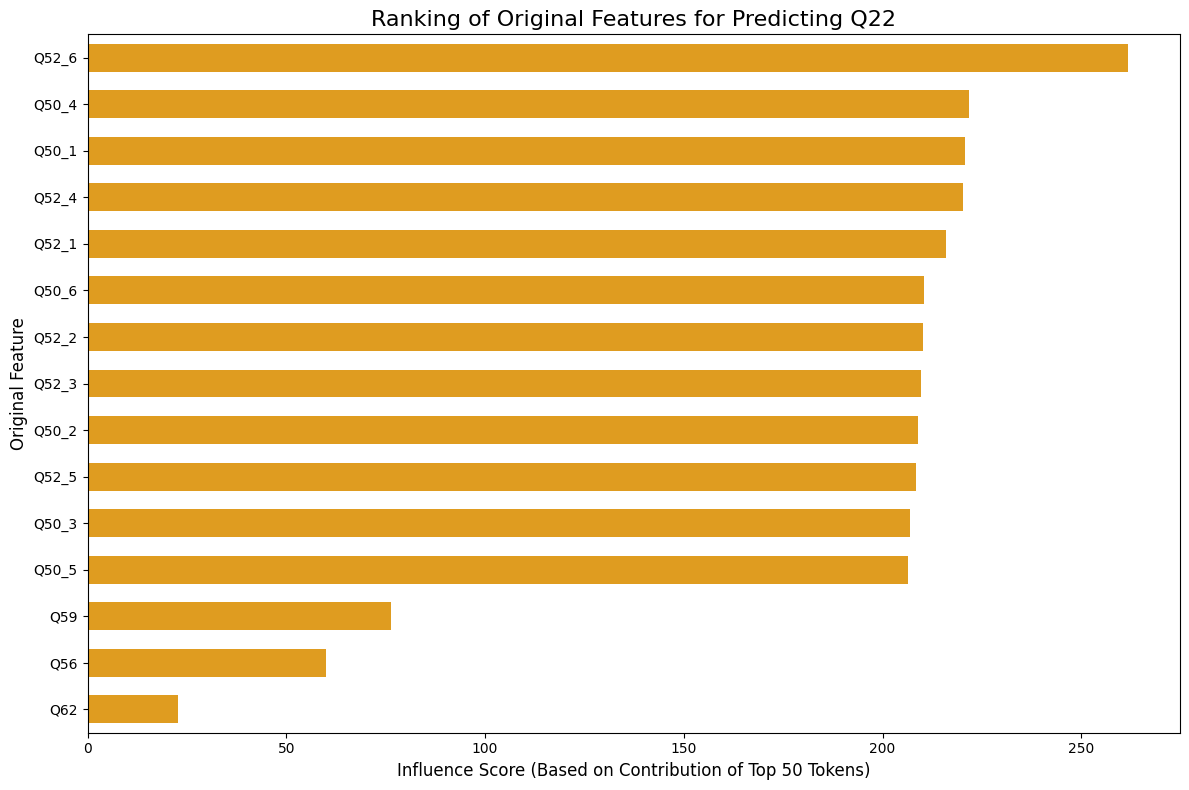


Feature Importance Analysis for Predicting Q31 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
agree         0.214011
strongly      0.213115
neutral       0.197790
disagree      0.185649
moped         0.117925
scooter       0.113995
travel        0.110039
yes           0.095716
currently     0.095136
car           0.089052
missing       0.077148
physically    0.074897
incapable     0.074897
walking       0.045851
minutes       0.045851
bike          0.042309
riding        0.042309
electric      0.042309
employed      0.026227
retired       0.026150
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q31 (based on top token influence):
Q50_6    131.870067
Q50_3    128.459710
Q50_1    128.196347
Q50_5    128.046675
Q52_2    126.095357
Q50_2    125.861997
Q52_3    121.973661
Q52_5    120.822066
Q50_4    120.155749
Q52_1    119.940284
Q52_4    116.927516
Q52_6    1

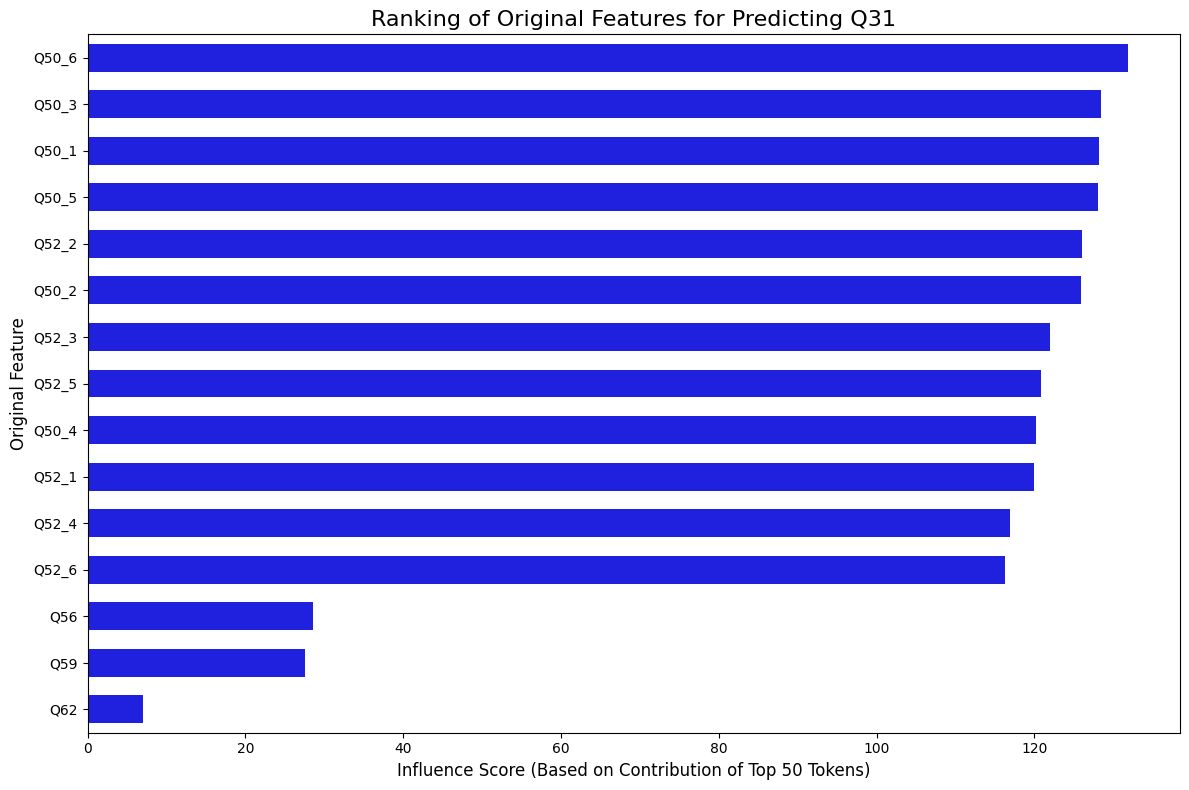


Feature Importance Analysis for Predicting Q35 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
neutral       0.276310
strongly      0.253731
disagree      0.192055
agree         0.138747
moped         0.131503
yes           0.121293
scooter       0.119237
currently     0.114857
car           0.093517
missing       0.048902
retired       0.041295
physically    0.038523
incapable     0.038523
travel        0.036461
employed      0.026907
bike          0.026605
electric      0.026605
riding        0.026605
minutes       0.018015
walking       0.018015
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q35 (based on top token influence):
Q50_6    124.780984
Q50_1    124.098071
Q52_6    121.240998
Q50_3    120.508474
Q50_2    120.460884
Q50_5    119.052713
Q52_2    117.354437
Q50_4    116.187249
Q52_3    115.701215
Q52_4    114.908864
Q52_5    114.904202
Q52_1    1

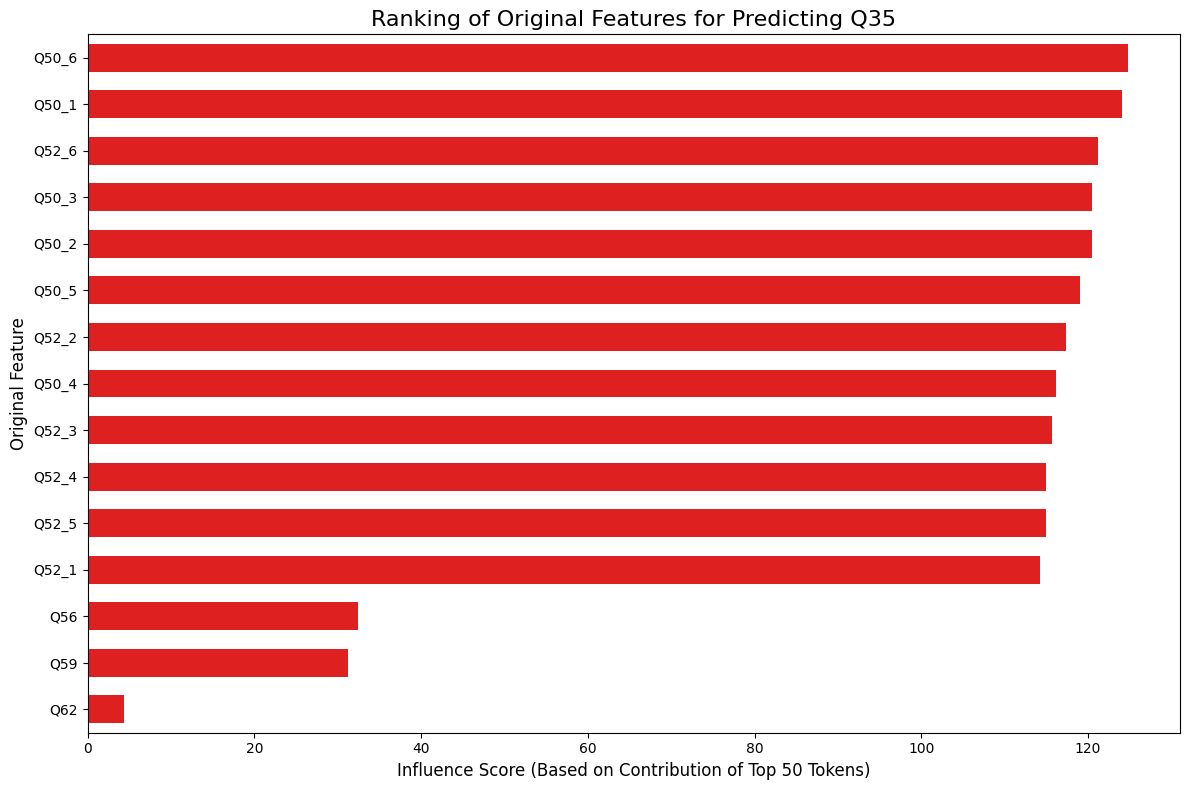


Feature Importance Analysis for Predicting Q27 (Based on Original Features):

Top 20 most influential tokens based on model coefficients:
strongly      0.252334
neutral       0.198570
disagree      0.189013
agree         0.186399
currently     0.108529
car           0.096922
yes           0.087099
scooter       0.085543
moped         0.084526
missing       0.062526
incapable     0.040791
physically    0.040791
travel        0.040051
bike          0.029278
electric      0.029278
riding        0.029278
minutes       0.027490
walking       0.027490
employed      0.027426
retired       0.027380
dtype: float64

Ranking original features based on the presence and influence of top tokens within them:

Original Feature Ranking for Q27 (based on top token influence):
Q50_6    131.668985
Q50_1    127.932514
Q50_3    127.203194
Q50_5    126.621341
Q52_2    124.534187
Q50_2    124.478906
Q52_3    119.860208
Q52_5    118.425272
Q50_4    118.366403
Q52_6    118.194354
Q52_1    117.565280
Q52_4    1

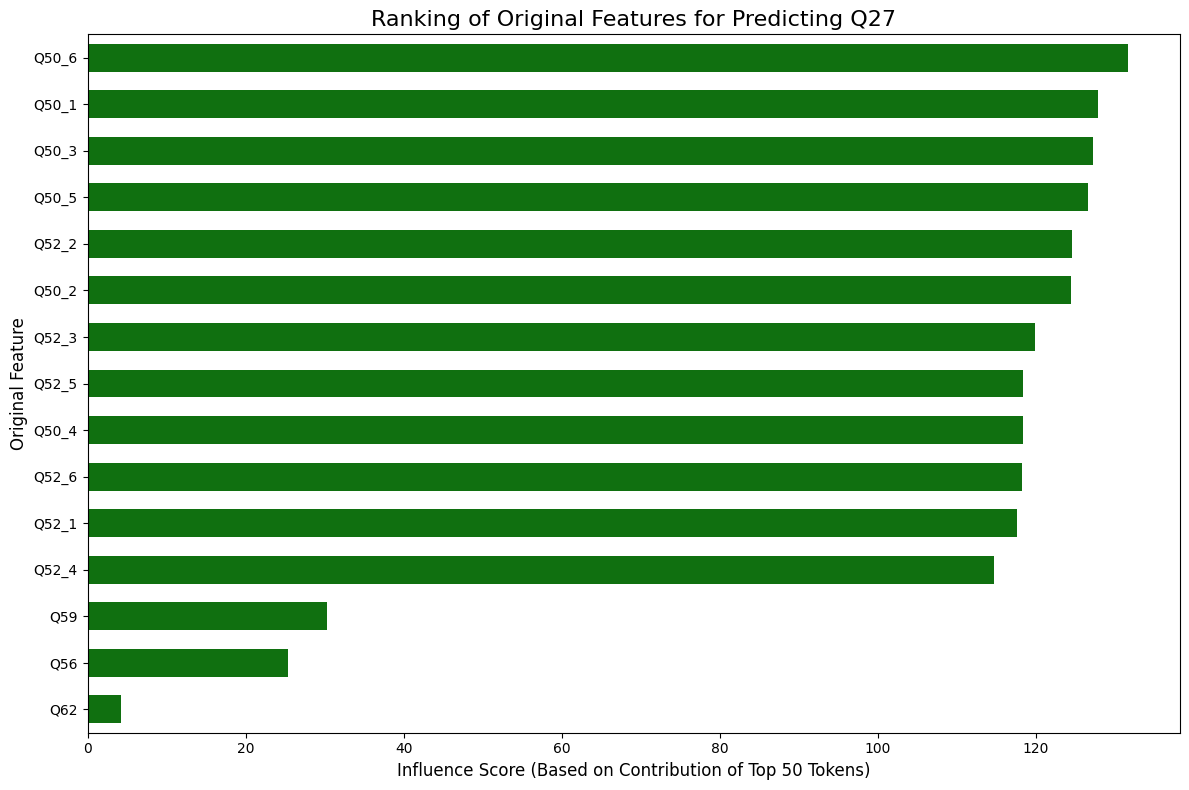

In [38]:

# Loop through new target variables to perform feature importance analysis
# Define features (X) and new target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6', 'Q56', 'Q59', 'Q62']
new_target_variables = ['Q22', 'Q31', 'Q35', 'Q27'] # Specify the new target variables

# Define a dictionary to map target variables to colors
new_target_color_map = {
    'Q22': 'orange',
    'Q31': 'blue',
    'Q35': 'red',
    'Q27': 'green'
}

for target_variable in new_target_variables:
    print(f"\nFeature Importance Analysis for Predicting {target_variable} (Based on Original Features):")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Get feature names (tokens) from the vectorizer
    token_names = vectorizer.get_feature_names_out()

    # Get model coefficients
    # For multi-class, Logistic Regression has one set of coefficients per class vs. rest.
    # We'll look at the average absolute coefficient value across all classes.
    if len(model.coef_.shape) > 1: # Multi-class
        coefs = np.mean(np.abs(model.coef_), axis=0)
    else: # Binary class
        coefs = np.abs(model.coef_[0]) # Use absolute value for magnitude

    # Create a mapping of token importance based on coefficient magnitude
    token_importance = pd.Series(coefs, index=token_names)
    token_importance = token_importance.sort_values(ascending=False)

    print("\nTop 20 most influential tokens based on model coefficients:")
    print(token_importance.head(20))

    # Now, we will relate these influential tokens back to the original features.
    # This is done by calculating a score for each original feature based on the
    # total TF-IDF score of the top tokens that appear within that feature.

    # Consider top N tokens for this analysis (e.g., top 50 or 100)
    num_top_tokens = 50
    top_tokens = token_importance.head(num_top_tokens).index.tolist()

    feature_token_scores = {}
    for feature in features:
        # Create a temporary TF-IDF vectorizer with the vocabulary limited to top tokens
        # This ensures we only consider the contribution of the most influential tokens
        temp_vectorizer = TfidfVectorizer(vocabulary=top_tokens)
        # Fit and transform the single feature column (ensure it's string type)
        # We use the raw column before previous preprocessing to get original token counts/tfidf
        # Need to handle potential NaNs by filling with empty string
        feature_vectorized = temp_vectorizer.fit_transform(df[feature].fillna('').astype(str))
        # Sum the TF-IDF scores for each of the top tokens within this feature
        token_sum_tfidf_in_feature = np.sum(feature_vectorized.toarray(), axis=0)
        # Map the sum of TF-IDF back to the token names
        feature_token_scores[feature] = pd.Series(token_sum_tfidf_in_feature, index=top_tokens)

    print("\nRanking original features based on the presence and influence of top tokens within them:")

    # Calculate a score for each original feature based on the total importance of top tokens within it
    # Weighted sum of TF-IDF scores of top tokens by their overall importance
    feature_scores = {}
    for feature in features:
         # Ensure we are only using the top_tokens from the overall token_importance
        relevant_token_importance = token_importance[top_tokens]
        # Multiply the TF-IDF sum of tokens in this feature by their overall importance and sum up
        score = np.sum(feature_token_scores[feature] * relevant_token_importance)
        feature_scores[feature] = score

    # Rank the features
    feature_ranking = pd.Series(feature_scores).sort_values(ascending=False)

    print(f"\nOriginal Feature Ranking for {target_variable} (based on top token influence):")
    print(feature_ranking)

    # Get the color for the current target variable
    bar_color = new_target_color_map.get(target_variable, 'gray') # Default to gray if not in map

    # Visualizing this ranking with enhanced labels and colors
    plt.figure(figsize=(12, 8))
    # Use the specified color for all bars for this target variable
    sns.barplot(x=feature_ranking.values, y=feature_ranking.index, color=bar_color, width=0.6) # Using specified color and width=0.6
    plt.title(f'Ranking of Original Features for Predicting {target_variable}', fontsize=16)
    plt.xlabel(f'Influence Score (Based on Contribution of Top {num_top_tokens} Tokens)', fontsize=12) # More informative label
    plt.ylabel('Original Feature', fontsize=12)
    plt.tight_layout()
    plt.show()


Feature Importance for Predicting Q39:
Analyzing model coefficients to infer feature importance:

Top 20 most important tokens based on model coefficients:
neutral       0.233586
strongly      0.231755
disagree      0.230276
agree         0.185752
scooter       0.146967
moped         0.146885
yes           0.120613
currently     0.105861
car           0.097085
missing       0.069755
incapable     0.060218
physically    0.060218
riding        0.051020
bike          0.051020
electric      0.051020
travel        0.050536
alone         0.039543
outside       0.039543
difficult     0.039543
makes         0.039543
dtype: float64

Ranking original features based on the total TF-IDF of top tokens within them:

Feature Ranking for Q39 (based on top token presence):
Q50_6    132.078490
Q50_1    131.305315
Q52_6    129.733564
Q50_3    128.320670
Q50_5    127.493396
Q50_2    127.236283
Q52_2    126.489488
Q50_4    124.363331
Q52_3    123.756295
Q52_1    122.903088
Q52_5    122.787175
Q52_4    122

/tmp/ipython-input-3167291313.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_ranking.values, y=feature_ranking.index, palette='viridis')


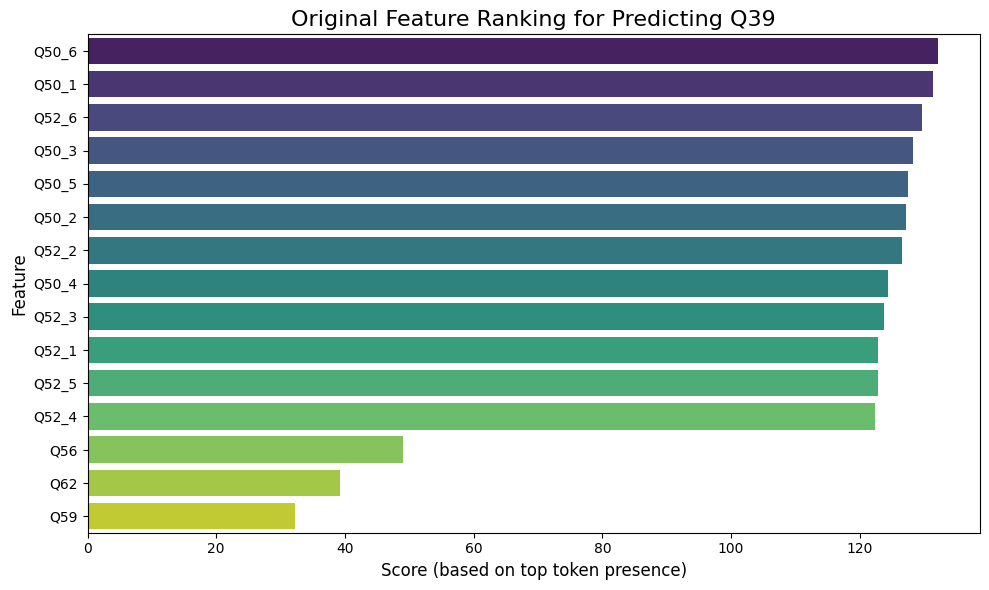


Feature Importance for Predicting Q43:
Analyzing model coefficients to infer feature importance:

Top 20 most important tokens based on model coefficients:
strongly      0.230605
disagree      0.178131
agree         0.173923
neutral       0.162649
car           0.116182
yes           0.109168
currently     0.092296
scooter       0.082694
moped         0.080382
missing       0.058425
incapable     0.044270
physically    0.044270
retired       0.039802
travel        0.039134
volunteer     0.029505
intern        0.029505
unpaid        0.029505
minutes       0.028337
walking       0.028337
bike          0.027411
dtype: float64

Ranking original features based on the total TF-IDF of top tokens within them:

Feature Ranking for Q43 (based on top token presence):
Q50_6    119.915535
Q50_1    116.347010
Q50_3    115.756020
Q50_5    115.397610
Q52_2    113.704767
Q50_2    112.856002
Q52_3    108.919053
Q52_6    108.016379
Q52_5    107.521797
Q50_4    107.451664
Q52_1    106.887719
Q52_4    103

/tmp/ipython-input-3167291313.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_ranking.values, y=feature_ranking.index, palette='viridis')


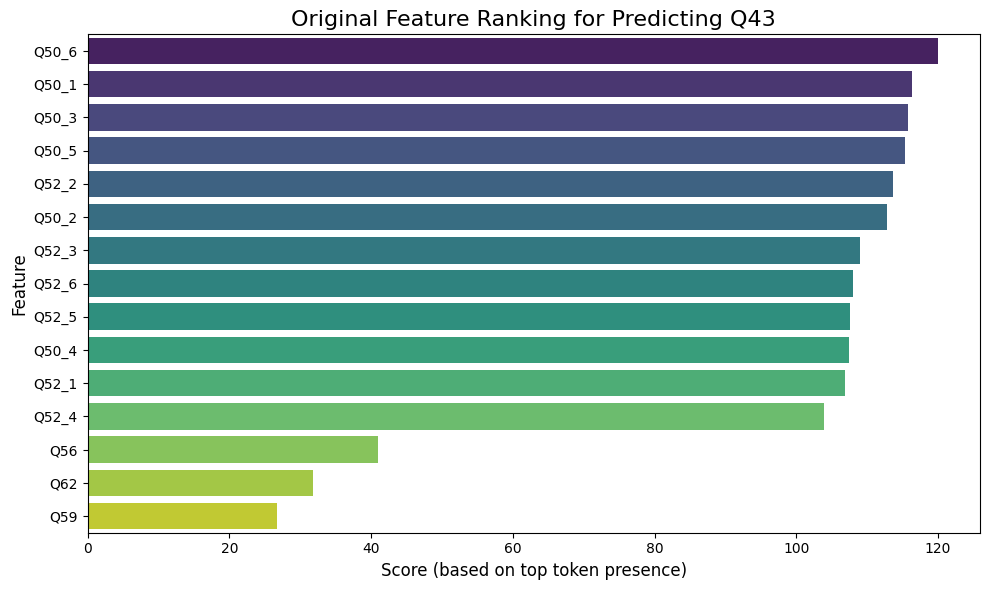


Feature Importance for Predicting Q47:
Analyzing model coefficients to infer feature importance:

Top 20 most important tokens based on model coefficients:
strongly      0.224919
agree         0.175126
neutral       0.146909
disagree      0.142041
car           0.095328
currently     0.091274
missing       0.090852
yes           0.088263
scooter       0.073783
moped         0.063923
incapable     0.063573
physically    0.063573
unpaid        0.062184
intern        0.062184
volunteer     0.062184
bike          0.041673
electric      0.041673
riding        0.041673
walking       0.034108
minutes       0.034108
dtype: float64

Ranking original features based on the total TF-IDF of top tokens within them:

Feature Ranking for Q47 (based on top token presence):
Q50_6    116.331933
Q50_3    112.213904
Q50_5    111.965343
Q50_1    111.213195
Q52_2    109.770660
Q50_2    108.651076
Q52_3    104.380580
Q52_5    102.982882
Q52_1    101.529541
Q50_4    101.354829
Q52_4     97.557015
Q52_6     97

/tmp/ipython-input-3167291313.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_ranking.values, y=feature_ranking.index, palette='viridis')


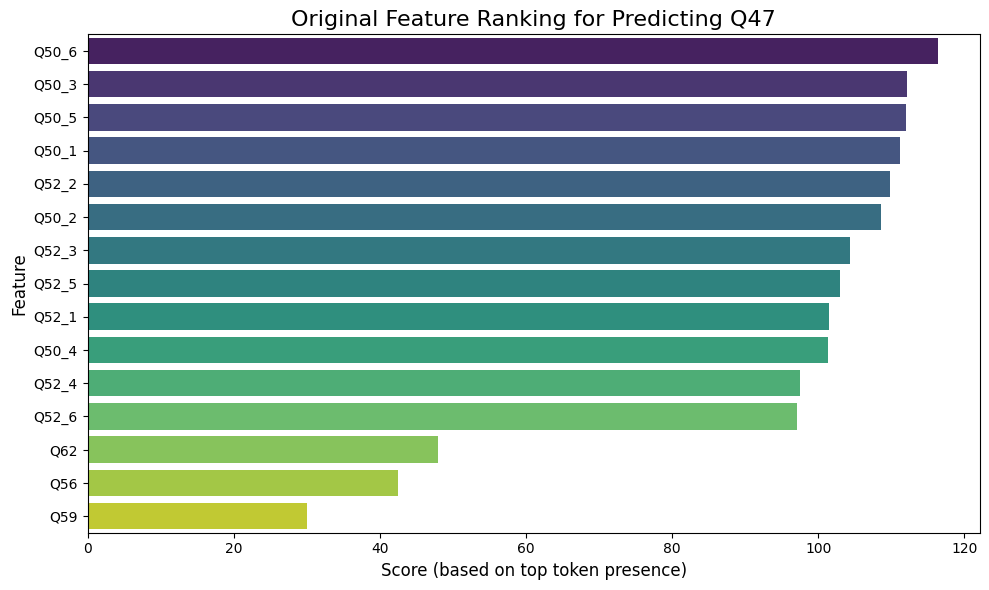

In [40]:

# Loop through each target variable to perform feature importance analysis
# Define features (X) and target variables (y)
features = ['Q50_1','Q50_2','Q50_3','Q50_4','Q50_5','Q50_6', 'Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6', 'Q56', 'Q59', 'Q62']
target_variables = ['Q39', 'Q43', 'Q47']
for target_variable in target_variables:
    print(f"\nFeature Importance for Predicting {target_variable}:")

    X = extracted_df[features]
    y = extracted_df[target_variable]

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Convert text data to numerical features using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

    # Model training (using Logistic Regression as an example)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Since we vectorized the features, the 'features' list from the original dataframe doesn't directly correspond
    # to the columns in the vectorized X. We need to link the importance back to the original features.

    # We can get the overall importance of tokens, but attributing it back to the *original* features
    # requires a different approach than direct coefficient analysis or permutation importance on the vectorized data directly.

    # One way is to analyze the vocabulary learned by the TF-IDF vectorizer and see which tokens are
    # most important based on the model's coefficients, then try to infer which original features those tokens came from.
    # However, this is an indirect method and might not give a clear ranking of the original features.

    # A simpler approach that might give some insight is to run permutation importance on the *original* features,
    # but this would require the model to be trained directly on those original features, which are text based.
    # Training a model directly on concatenated text from different columns isn't standard for feature importance
    # on individual text columns like this.

    # Given the structure, let's try to analyze the coefficients of the Logistic Regression model
    # and see if we can map important tokens back to the original features. This is an approximation
    # and not a perfect measure of original feature importance.

    print("Analyzing model coefficients to infer feature importance:")

    # Get feature names (tokens) from the vectorizer
    token_names = vectorizer.get_feature_names_out()

    # Get model coefficients
    # For multi-class, Logistic Regression has one set of coefficients per class vs. rest.
    # We'll look at the average absolute coefficient value across all classes.
    if len(model.coef_.shape) > 1: # Multi-class
        coefs = np.mean(np.abs(model.coef_), axis=0)
    else: # Binary class
        coefs = np.abs(model.coef_[0]) # Use absolute value for magnitude

    # Create a mapping of token importance
    token_importance = pd.Series(coefs, index=token_names)
    token_importance = token_importance.sort_values(ascending=False)

    print("\nTop 20 most important tokens based on model coefficients:")
    print(token_importance.head(20))

    # Now, we need to try and relate these important tokens back to the original features.
    # This is tricky because the tokens come from the concatenation of all features.
    # We can count how many times the top tokens appear in each original feature.

    top_tokens = token_importance.head(50).index.tolist() # Consider top 50 tokens

    feature_token_counts = {}
    for feature in features:
        # Create a temporary TF-IDF vectorizer for just this feature
        temp_vectorizer = TfidfVectorizer(vocabulary=top_tokens)
        # Fit and transform the single feature column (ensure it's string type)
        feature_vectorized = temp_vectorizer.fit_transform(extracted_df[feature].astype(str))
        # Get the sum of TF-IDF values for each token in this feature
        token_sum_tfidf = np.sum(feature_vectorized.toarray(), axis=0)
        # Map the sum of TF-IDF back to the token names
        feature_token_counts[feature] = pd.Series(token_sum_tfidf, index=top_tokens)

    print("\nRanking original features based on the total TF-IDF of top tokens within them:")

    # Calculate a score for each original feature based on the total importance of top tokens within it
    feature_scores = {}
    for feature in features:
        # Multiply token importance by the count/tfidf of that token in the feature and sum
        score = np.sum(feature_token_counts[feature] * token_importance[top_tokens])
        feature_scores[feature] = score

    # Rank the features
    feature_ranking = pd.Series(feature_scores).sort_values(ascending=False)

    print(f"\nFeature Ranking for {target_variable} (based on top token presence):")
    print(feature_ranking)

    # Visualizing this ranking
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_ranking.values, y=feature_ranking.index, palette='viridis')
    plt.title(f'Original Feature Ranking for Predicting {target_variable}', fontsize=16)
    plt.xlabel('Score (based on top token presence)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()